#Imports

In [ ]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.9/375.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 37.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pybaseball as pyb
import seaborn as sns
import numpy as np

In [ ]:
pd.set_option('display.max_column', None)

#Compiled DFs

##Pitching Df

In [ ]:
train_2022_pitch = pd.read_csv('train_2022_pitch.csv')

In [ ]:
train_2022_pitch['Season'] = train_2022_pitch['Season'].fillna(2021.0)#Ensures that each years free agents are labeled correctly
train_2022_pitch#.loc[train_2022_pitch['G'].isna()].shape

Unnamed: 0               Name Pos Bats Thr Prev Team  Age  Service Time  \
0            0       Max Scherzer  SP    R   R       LAD   37        13.079   
1            1       Carlos Rodón  SP    L   L       CHW   29         6.168   
2            2      Kevin Gausman  SP    L   R       SFG   31         7.151   
3            3  Eduardo Rodriguez  SP    L   L       BOS   29         6.130   
4            4         Robbie Ray  SP    L   L       TOR   30         7.007   
..         ...                ...  ..  ...  ..       ...  ...           ...   
93          93      Nick Martinez  SP    L   R       JPN   31         3.002   
94          94      Drew VerHagen  RP    R   R       JPN   31         3.066   
95          95      Robert Suarez  RP    R   R       JPN   31           NaN   
96          96   Justin Verlander  SP    R   R       HOU   39        16.002   
97          97        Kirby Yates  RP    L   R       TOR   35         7.021   

            QO Signing Team  Years  Total Salary          AAV  playerid  \
0          NaN          NYM    3.0   130000000.0  43333333.33      3137   
1          NaN          SFG    1.0    21500000.0  22000000.00     16137   
2          NaN          TOR    5.0   110000000.0  22000000.00     14107   
3   18400000.0          DET    2.0    22846154.0   8846154.00     13164   
4   18400000.0          SEA    5.0   115000000.0  23000000.00     11486   
..         ...          ...    ...           ...          ...       ...   
93         NaN          SDP    4.0    25500000.0   6375000.00     12730   
94         NaN          STL    2.0     5500000.0   2750000.00     13424   
95         NaN          SDP    2.0    11000000.0   5500000.00     30115   
96  18400000.0          HOU    2.0    50000000.0  25000000.00      8700   
97         NaN          ATL    2.0     8250000.0   4125000.00      9073   

    Season     W    L   SV     G    GS     IP    K/9  BB/9  HR/9  BABIP  \
0   2021.0  15.0  4.0  0.0  30.0  30.0  179.1  11.84  1.81  1.15  0.247   
1   2021.0  13.0  5.0  0.0  24.0  24.0  132.2  12.55  2.44  0.88  0.267   
2   2021.0  14.0  6.0  0.0  33.0  33.0  192.0  10.64  2.34  0.94  0.274   
3   2021.0  13.0  8.0  0.0  32.0  31.0  157.2  10.56  2.68  1.08  0.363   
4   2021.0  13.0  7.0  0.0  32.0  32.0  193.1  11.54  2.42  1.54  0.268   
..     ...   ...  ...  ...   ...   ...    ...    ...   ...   ...    ...   
93  2021.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
94  2021.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
95  2021.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
96  2021.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
97  2021.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   

     LOB%      H    BB     SO   WP     K%    BB%    AVG  WHIP   ERA   FIP  \
0   0.843  119.0  36.0  236.0  2.0  0.341  0.052  0.184  0.86  2.46  2.97   
1   0.822   91.0  36.0  185.0  7.0  0.346  0.067  0.186  0.96  2.37  2.65   
2   0.784  150.0  50.0  227.0  7.0  0.293  0.065  0.208  1.04  2.81  3.00   
3   0.689  172.0  47.0  185.0  0.0  0.274  0.070  0.275  1.39  4.74  3.32   
4   0.901  150.0  52.0  248.0  5.0  0.321  0.067  0.209  1.04  2.84  3.69   
..    ...    ...   ...    ...  ...    ...    ...    ...   ...   ...   ...   
93    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   
94    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   
95    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   
96    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   
97    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   

     E-F  xFIP  GB/FB    LD%    GB%    FB%  Soft%   Med%  Hard%   WPA  WAR  
0  -0.52  3.24   0.69  0.182  0.335  0.483  0.170  0.484  0.345  4.37  5.4  
1  -0.28  3.17   0.84  0.173  0.377  0.450  0.201  0.523  0.276  2.50  5.0  
2  -0.19  3.28   1.15  0.216  0.419  0.365  0.162  0.496  0.342  2.69  4.8  
3   1.42  3.43   1.2

In [ ]:
train_2023_pitch = pd.read_csv('train_2023_pitch.csv')

In [ ]:
train_2023_pitch['Season'] = train_2023_pitch['Season'].fillna(2022.0)#Ensures that each yeats free agents are labeled correctly
train_2023_pitch

Unnamed: 0               Name Pos Bats Thr Prev Team  Age  Service Time  \
0            0       Carlos Rodón  SP    L   L       SFG   30         7.168   
1            1   Justin Verlander  SP    R   R       HOU   40        17.002   
2            2     Tyler Anderson  SP    L   L       LAD   33         7.065   
3            3      Jose Quintana  SP    R   L       STL   34        10.133   
4            4       Martín Pérez  SP    L   L       TEX   32        10.038   
..         ...                ...  ..  ...  ..       ...  ...           ...   
80          80         Alex Reyes  RP    R   R       STL   28         5.056   
81          81      Nick Anderson  RP    R   R       TBR   32         3.153   
82          82        Kodai Senga  SP    L   R       JPN   30           NaN   
83          83  Shintaro Fujinami  SP    R   R       JPN   29           NaN   
84          84      Julio Teheran  SP    R   R       DET   32         9.062   

            QO Signing Team  Years  Total Salary         AAV  playerid  \
0   19650000.0          NYY    6.0   162000000.0  27000000.0     16137   
1          NaN          NYM    3.0   121666666.0  43333333.0      8700   
2   19650000.0          LAA    3.0    39000000.0  13000000.0     12880   
3          NaN          NYM    2.0    26000000.0  13000000.0     11423   
4   19650000.0          TEX    1.0    19650000.0  19650000.0      6902   
..         ...          ...    ...           ...         ...       ...   
80         NaN          LAD    1.0     1100000.0   1100000.0     15015   
81         NaN          ATL    1.0      875000.0    875000.0     18337   
82         NaN          NYM    5.0    75000000.0  15000000.0     31838   
83         NaN          OAK    1.0     3250000.0   3250000.0     31839   
84         NaN          MIL    1.0     1500000.0   1500000.0      6797   

    Season     W     L    SV     G    GS     IP    K/9  BB/9  HR/9  BABIP  \
0   2021.0  13.0   5.0   0.0  24.0  24.0  132.2  12.55  2.44  0.88  0.267   
1   2022.0   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
2   2021.0   7.0  11.0   0.0  31.0  31.0  167.0   7.22  2.05  1.46  0.284   
3   2021.0   0.0   3.0   0.0  29.0  10.0   63.0  12.14  5.00  1.71  0.378   
4   2021.0   7.0   8.0   0.0  36.0  22.0  114.0   7.66  2.84  1.50  0.336   
..     ...   ...   ...   ...   ...   ...    ...    ...   ...   ...    ...   
80  2021.0  10.0   8.0  29.0  69.0   0.0   72.1  11.82  6.47  1.12  0.233   
81  2021.0   0.0   1.0   1.0   6.0   0.0    6.0   1.50  3.00  3.00  0.105   
82  2022.0   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
83  2022.0   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
84  2021.0   1.0   0.0   0.0   1.0   1.0    5.0   5.40  5.40  1.80  0.231   

     LOB%      H    BB     SO    WP     K%    BB%    AVG  WHIP   ERA   FIP  \
0   0.822   91.0  36.0  185.0   7.0  0.346  0.067  0.186  0.96  2.37  2.65   
1     NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   
2   0.713  170.0  38.0  134.0   1.0  0.191  0.054  0.256  1.25  4.53  4.37   
3   0.644   74.0  35.0   85.0   7.0  0.286  0.118  0.284  1.73  6.43  4.66   
4   0.712  136.0  36.0   97.0   2.0  0.191  0.071  0.293  1.51  4.74  4.82   
..    ...    ...   ...    ...   ...    ...    ...    ...   ...   ...   ...   
80  0.778   46.0  52.0   95.0  10.0  0.300  0.164  0.175  1.35  3.24  4.40   
81  0.938    4.0   2.0    1.0   0.0  0.042  0.083  0.182  1.00  4.50  8.17   
82    NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   
83    NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   
84  1.000    4.0   3.0    3.0   0.0  0.150  0.150  0.235  1.40  1.80  6.37   

     E-F  xFIP  GB/FB    LD%    GB%    FB%  Soft%   Med%  Hard%   WPA  WAR  
0  -0.28  3.17   0.84  0.173  0.377  0.450  0.201  0.523  0.276  2.50  5.0  
1    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN  NaN  
2   0.16  4.60   0.81  0.218  0.351  0.431  0.158  0.560  0.281 -0.36  2.

In [ ]:
train_2024_pitch = pd.read_csv('train_2024_pitch.csv')

In [ ]:
train_2024_pitch['Season'] = train_2024_pitch['Season'].fillna(2023.0)#Ensures that each years free agents are labeled correctly
train_2024_pitch

Unnamed: 0                Name Pos Bats Thr Prev Team  Age  Service Time  \
0             0          Sonny Gray  SP    R   R       MIN   34        10.061   
1             1   Jordan Montgomery  SP    L   L       TEX   31         6.153   
2             2         Blake Snell  SP    L   L       SDP   31         7.072   
3             3          Aaron Nola  SP    R   R       PHI   31         8.076   
4             4   Eduardo Rodriguez  SP    L   L       DET   31         8.070   
..          ...                 ...  ..  ...  ..       ...  ...           ...   
100         100         Erick Fedde  SP    R   R       KBO   31         4.099   
101         101  Yoshinobu Yamamoto  SP    R   R       JPN   25         0.000   
102         102         Yuki Matsui  RP    L   L       JPN   28         0.000   
103         103       Shota Imanaga  SP    L   L       JPN   30         0.000   
104         104       Justin Wilson  RP    L   L       MIL   36        11.035   

             QO Signing Team  Years  Total Salary          AAV  playerid  \
0    20325000.0          STL    3.0    75000000.0  24949117.00     12768   
1           NaN          ARI    2.0    47500000.0  23750000.00     16511   
2    20325000.0          SFG    2.0    62000000.0  29698347.00     13543   
3    20325000.0          PHI    7.0   172000003.0  24571429.00     16149   
4           NaN          ARI    4.0    80000000.0  20000000.00     13164   
..          ...          ...    ...           ...          ...       ...   
100         NaN          CHW    2.0    15000000.0   7500000.00     17425   
101         NaN          LAD   12.0   325000000.0  27083333.33     33825   
102         NaN          SDP    5.0    28000000.0   5600000.00     33826   
103         NaN          CHC    4.0    53250000.0  13500000.00     33829   
104         NaN          CIN    1.0     1500000.0   1500000.00      4301   

     Season     W     L   SV     G    GS     IP    K/9  BB/9  HR/9  BABIP  \
0    2023.0   8.0   8.0  0.0  32.0  32.0  184.0   8.95  2.69  0.39  0.295   
1    2023.0  10.0  11.0  0.0  32.0  32.0  188.2   7.92  2.29  0.86  0.294   
2    2023.0  14.0   9.0  0.0  32.0  32.0  180.0  11.70  4.95  0.75  0.256   
3    2023.0  12.0   9.0  0.0  32.0  32.0  193.2   9.39  2.09  1.49  0.285   
4    2023.0  13.0   9.0  0.0  26.0  26.0  152.2   8.43  2.83  0.88  0.274   
..      ...   ...   ...  ...   ...   ...    ...    ...   ...   ...    ...   
100  2023.0   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
101  2023.0   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
102  2023.0   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
103  2023.0   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
104  2023.0   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   

      LOB%      H    BB     SO    WP     K%    BB%    AVG  WHIP   ERA   FIP  \
0    0.768  156.0  55.0  183.0   6.0  0.243  0.073  0.225  1.15  2.79  2.83   
1    0.756  177.0  48.0  166.0   6.0  0.214  0.062  0.244  1.19  3.20  3.56   
2    0.867  115.0  99.0  234.0  13.0  0.315  0.133  0.180  1.19  2.25  3.44   
3    0.664  178.0  45.0  202.0   2.0  0.255  0.057  0.238  1.15  4.46  4.03   
4    0.759  128.0  48.0  143.0   3.0  0.230  0.077  0.225  1.15  3.30  3.66   
..     ...    ...   ...    ...   ...    ...    ...    ...   ...   ...   ...   
100    NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   
101    NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   
102    NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   
103    NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   
104    NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   

      E-F  xFIP  GB/FB    LD%    GB%    FB%  Soft%   Med%  Hard%   WPA  WAR  
0   -0.04  3.64   1.55  0.222  0.473  0.305  0.143  0.557  0.300  3.01  5.4  
1   -0.37  4.01   1.24  0.220  0.432  0.348  0.143  0.535  0.322  1.73  4.3  
2   -1.19  

In [ ]:
pitchers_22thru24 = pd.concat([train_2022_pitch, train_2023_pitch, train_2024_pitch]) #This has all 3 years for pitchers
pitchers_22thru24

Unnamed: 0                Name Pos Bats Thr Prev Team  Age  Service Time  \
0             0        Max Scherzer  SP    R   R       LAD   37        13.079   
1             1        Carlos Rodón  SP    L   L       CHW   29         6.168   
2             2       Kevin Gausman  SP    L   R       SFG   31         7.151   
3             3   Eduardo Rodriguez  SP    L   L       BOS   29         6.130   
4             4          Robbie Ray  SP    L   L       TOR   30         7.007   
..          ...                 ...  ..  ...  ..       ...  ...           ...   
100         100         Erick Fedde  SP    R   R       KBO   31         4.099   
101         101  Yoshinobu Yamamoto  SP    R   R       JPN   25         0.000   
102         102         Yuki Matsui  RP    L   L       JPN   28         0.000   
103         103       Shota Imanaga  SP    L   L       JPN   30         0.000   
104         104       Justin Wilson  RP    L   L       MIL   36        11.035   

             QO Signing Team  Years  Total Salary          AAV  playerid  \
0           NaN          NYM    3.0   130000000.0  43333333.33      3137   
1           NaN          SFG    1.0    21500000.0  22000000.00     16137   
2           NaN          TOR    5.0   110000000.0  22000000.00     14107   
3    18400000.0          DET    2.0    22846154.0   8846154.00     13164   
4    18400000.0          SEA    5.0   115000000.0  23000000.00     11486   
..          ...          ...    ...           ...          ...       ...   
100         NaN          CHW    2.0    15000000.0   7500000.00     17425   
101         NaN          LAD   12.0   325000000.0  27083333.33     33825   
102         NaN          SDP    5.0    28000000.0   5600000.00     33826   
103         NaN          CHC    4.0    53250000.0  13500000.00     33829   
104         NaN          CIN    1.0     1500000.0   1500000.00      4301   

     Season     W    L   SV     G    GS     IP    K/9  BB/9  HR/9  BABIP  \
0    2021.0  15.0  4.0  0.0  30.0  30.0  179.1  11.84  1.81  1.15  0.247   
1    2021.0  13.0  5.0  0.0  24.0  24.0  132.2  12.55  2.44  0.88  0.267   
2    2021.0  14.0  6.0  0.0  33.0  33.0  192.0  10.64  2.34  0.94  0.274   
3    2021.0  13.0  8.0  0.0  32.0  31.0  157.2  10.56  2.68  1.08  0.363   
4    2021.0  13.0  7.0  0.0  32.0  32.0  193.1  11.54  2.42  1.54  0.268   
..      ...   ...  ...  ...   ...   ...    ...    ...   ...   ...    ...   
100  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
101  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
102  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
103  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   
104  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   

      LOB%      H    BB     SO   WP     K%    BB%    AVG  WHIP   ERA   FIP  \
0    0.843  119.0  36.0  236.0  2.0  0.341  0.052  0.184  0.86  2.46  2.97   
1    0.822   91.0  36.0  185.0  7.0  0.346  0.067  0.186  0.96  2.37  2.65   
2    0.784  150.0  50.0  227.0  7.0  0.293  0.065  0.208  1.04  2.81  3.00   
3    0.689  172.0  47.0  185.0  0.0  0.274  0.070  0.275  1.39  4.74  3.32   
4    0.901  150.0  52.0  248.0  5.0  0.321  0.067  0.209  1.04  2.84  3.69   
..     ...    ...   ...    ...  ...    ...    ...    ...   ...   ...   ...   
100    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   
101    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   
102    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   
103    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   
104    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   NaN   

      E-F  xFIP  GB/FB    LD%    GB%    FB%  Soft%   Med%  Hard%   WPA  WAR  
0   -0.52  3.24   0.69  0.182  0.335  0.483  0.170  0.484  0.345  4.37  5.4  
1   -0.28  3.17   0.84  0.173  0.377  0.450  0.201  0.523  0.276  2.50  5.0  
2   -0.19  3.28   1.15  0.216  0.41

##Position Players

In [ ]:
train_2022_pos = pd.read_csv('train_2022_pos.csv')

In [ ]:
train_2022_pos['Season'] = train_2022_pos['Season'].fillna(2021.0)#Ensures that each yeats free agents are labeled correctly
train_2022_pos#.loc[train_2022_pitch['G'].isna()].shape

Unnamed: 0             Name       Pos Bats Thr Prev Team  Age  \
0            0    Carlos Correa        SS    R   R       HOU   27   
1            1    Marcus Semien     2B/SS    R   R       TOR   31   
2            2   Starling Marte  CF/RF/LF    R   R       OAK   33   
3            3  Freddie Freeman        1B    L   R       ATL   32   
4            4      Javier Báez     SS/2B    R   R       NYM   29   
..         ...              ...       ...  ...  ..       ...  ...   
61          61   Pedro Severino         C    R   R       BAL   28   
62          62    Clint Frazier     RF/LF    R   R       NYY   27   
63          63     Andrew Knapp         C    S   R       PHI   30   
64          64     Seiya Suzuki        RF    R   R       JPN   27   
65          65   Aníbal Sánchez       NaN    R   R       WSN   38   

    Service Time          QO Signing Team  Years  Total Salary          AAV  \
0          6.119  18400000.0          MIN    1.0    35100000.0  35100000.00   
1          7.118  18400000.0          TEX    7.0   175000000.0  25000000.00   
2          8.162         NaN          NYM    4.0    78000000.0  19500000.00   
3         11.033  18400000.0          LAD    6.0   162000000.0  24700000.00   
4          6.089         NaN          DET    6.0   140000000.0  23333333.33   
..           ...         ...          ...    ...           ...          ...   
61         4.099         NaN          MIL    1.0      981319.0    981319.00   
62         3.149         NaN          CHC    1.0     1500000.0   1500000.00   
63         5.000         NaN          PIT    1.0      800000.0    800000.00   
64           NaN         NaN          CHC    5.0    85000000.0  17000000.00   
65        14.083         NaN          WSN    1.0     2000000.0   2000000.00   

    playerid  Season      G     AB     PA      H     1B    2B   3B    HR  \
0      14162  2021.0  148.0  555.0  640.0  155.0   94.0  34.0  1.0  26.0   
1      12533  2021.0  162.0  652.0  724.0  173.0   87.0  39.0  2.0  45.0   
2       9241  2021.0  120.0  467.0  526.0  145.0  103.0  27.0  3.0  12.0   
3       5361  2021.0  159.0  600.0  695.0  180.0  122.0  25.0  2.0  31.0   
4      12979  2021.0  138.0  502.0  547.0  133.0   82.0  18.0  2.0  31.0   
..       ...     ...    ...    ...    ...    ...    ...   ...  ...   ...   
61     14523  2021.0  113.0  379.0  419.0   94.0   65.0  18.0  0.0  11.0   
62     15983  2021.0   66.0  183.0  218.0   34.0   20.0   9.0  0.0   5.0   
63     14942  2021.0   62.0  145.0  159.0   22.0   17.0   3.0  0.0   2.0   
64     30116  2021.0    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   
65      3284  2021.0    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   

        R    RBI    BB   IBB    SB    AVG    BB%     K%    OBP    SLG    OPS  \
0   104.0   92.0  75.0   2.0   0.0  0.279  0.117  0.181  0.366  0.485  0.850   
1   115.0  102.0  66.0   0.0  15.0  0.265  0.091  0.202  0.334  0.538  0.873   
2    89.0   55.0  43.0   2.0  47.0  0.310  0.082  0.188  0.383  0.458  0.841   
3   120.0   83.0  85.0  15.0   8.0  0.300  0.122  0.154  0.393  0.503  0.896   
4    80.0   87.0  28.0   2.0  18.0  0.265  0.051  0.336  0.319  0.494  0.813   
..    ...    ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
61   32.0   46.0  34.0   1.0   0.0  0.248  0.081  0.260  0.308  0.383  0.690   
62   20.0   15.0  32.0   0.0   2.0  0.186  0.147  0.298  0.317  0.317  0.633   
63   13.0   11.0  10.0   0.0   0.0  0.152  0.063  0.384  0.215  0.214  0.429   
64    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
65    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ISO  BABIP   wOBA  xwOBA   wRC+  BABIP.1    LD%    GB%    FB%  Soft%  \
0   0.205  0.308  0.364  0.373  133.0    0.308  0.236  0.416  0.348  0.169   
1   0.273  0.276  0.368  0.336  131.0    0.276  0.208  0.310  0.481  0.151   
2   0.148  0.372  0.364  0.347  132.0    0.372  0.211  0.548  0.241  0.189   
3   0.203  0.321  0.379  0.416  136.0   

In [ ]:
train_2023_pos = pd.read_csv('train_2023_pos.csv')

In [ ]:
train_2023_pos['Season'] = train_2023_pos['Season'].fillna(2022.0)#Ensures that each yeats free agents are labeled correctly
train_2023_pos#.loc[train_2022_pitch['G'].isna()].shape

Unnamed: 0              Name       Pos Bats Thr Prev Team  Age  \
0            0       Aaron Judge     RF/CF    R   R       NYY   31   
1            1    Dansby Swanson        SS    R   R       ATL   29   
2            2       Trea Turner     SS/2B    R   R       LAD   30   
3            3   Xander Bogaerts        SS    R   R       BOS   30   
4            4     Brandon Nimmo  CF/RF/LF    L   R       NYM   30   
..         ...               ...       ...  ...  ..       ...  ...   
80          80     Jesús Aguilar        1B    R   R       BAL   33   
81          81   Tommy La Stella     2B/3B    L   R       SFG   34   
82          82     Franmil Reyes     DH/RF    R   R       CHC   27   
83          83  Michael Conforto     RF/LF    L   R       NYM   30   
84          84  Masataka Yoshida        LF    L   R       JPN   29   

    Service Time          QO Signing Team  Years  Total Salary          AAV  \
0          6.051  19650000.0          NYY    9.0   360000000.0  40000000.00   
1          6.047  19650000.0          CHC    7.0   177000000.0  25285714.29   
2          6.135  19650000.0          PHI   11.0   300000000.0  27272727.27   
3          9.042  19650000.0          SDP   11.0   280000000.0  25454545.45   
4          6.042  19650000.0          NYM    8.0   162000000.0  20250000.00   
..           ...         ...          ...    ...           ...          ...   
80         6.082         NaN          OAK    1.0     3000000.0   3000000.00   
81         8.057         NaN          SEA    1.0      720000.0    720000.00   
82         4.115         NaN          KCR    1.0     2000000.0   2000000.00   
83         6.043         NaN          SFG    2.0    36000000.0  18000000.00   
84         0.000         NaN          BOS    5.0    90000000.0  18000000.00   

    playerid  Season      G     AB     PA      H     1B    2B   3B    HR  \
0      15640  2022.0  157.0  570.0  696.0  177.0   87.0  28.0  0.0  62.0   
1      18314  2022.0  162.0  640.0  696.0  177.0  119.0  32.0  1.0  25.0   
2      16252  2022.0  160.0  652.0  708.0  194.0  130.0  39.0  4.0  21.0   
3      12161  2022.0  150.0  557.0  631.0  171.0  118.0  38.0  0.0  15.0   
4      12927  2022.0  151.0  580.0  673.0  159.0  106.0  30.0  7.0  16.0   
..       ...     ...    ...    ...    ...    ...    ...   ...  ...   ...   
80     11342  2022.0  129.0  464.0  507.0  109.0   74.0  19.0  0.0  16.0   
81     12371  2022.0   60.0  180.0  195.0   43.0   27.0  14.0  0.0   2.0   
82     14566  2022.0  118.0  438.0  473.0   97.0   64.0  17.0  2.0  14.0   
83     16376  2022.0    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   
84     31837  2022.0    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   

        R    RBI     BB   IBB    SB    AVG    BB%     K%    OBP    SLG    OPS  \
0   133.0  131.0  111.0  19.0  16.0  0.311  0.159  0.251  0.425  0.686  1.111   
1    99.0   96.0   49.0   0.0  18.0  0.277  0.070  0.261  0.329  0.447  0.776   
2   101.0  100.0   45.0   1.0  27.0  0.298  0.064  0.185  0.343  0.466  0.809   
3    84.0   73.0   57.0   2.0   8.0  0.307  0.090  0.187  0.377  0.456  0.833   
4   102.0   64.0   71.0   0.0   3.0  0.274  0.105  0.172  0.367  0.433  0.800   
..    ...    ...    ...   ...   ...    ...    ...    ...    ...    ...    ...   
80   39.0   51.0   28.0   1.0   1.0  0.235  0.055  0.235  0.281  0.379  0.661   
81   17.0   14.0   11.0   0.0   0.0  0.239  0.056  0.154  0.282  0.350  0.632   
82   43.0   47.0   30.0   0.0   2.0  0.221  0.063  0.332  0.273  0.365  0.638   
83    NaN    NaN    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
84    NaN    NaN    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ISO  BABIP   wOBA  xwOBA   wRC+  BABIP.1    LD%    GB%    FB%  Soft%  \
0   0.375  0.340  0.458  0.463  206.0    0.340  0.193  0.373  0.435  0.075   
1   0.170  0.348  0.337  0.337  117.0    0.348  0.212  0.387  0.400  0.134   
2   0.169  0.342  0.350  0.335  128.0    0.342  0.214  0.429  0.357  0.163   
3   0.149  0.362

In [ ]:
train_2024_pos = pd.read_csv('train_2024_pos.csv')

In [ ]:
train_2024_pos['Season'] = train_2024_pos['Season'].fillna(2023.0)#Ensures that each yeats free agents are labeled correctly
train_2024_pos#.loc[train_2022_pitch['G'].isna()].shape

Unnamed: 0               Name       Pos Bats Thr Prev Team  Age  \
0            0      Shohei Ohtani     DH/SP    L   R       LAA   29   
1            1     Cody Bellinger     CF/1B    L   L       CHC   28   
2            2  Jeimer Candelario     3B/1B    S   R       CHC   30   
3            3       Matt Chapman        3B    R   R       TOR   31   
4            4    Kevin Kiermaier        CF    L   R       TOR   34   
..         ...                ...       ...  ...  ..       ...  ...   
73          73   Jurickson Profar  LF/RF/1B    S   R       SDP   31   
74          74      Jose Iglesias     SS/2B    R   R       SDP   34   
75          75        Miguel Sanó     DH/1B    R   R       MIN   31   
76          76       Rhys Hoskins        1B    R   R       PHI   31   
77          77       Jung Hoo Lee        CF    L   R       KBO   25   

    Service Time          QO Signing Team  Years  Total Salary          AAV  \
0          6.000  20325000.0          LAD   10.0   700000000.0  46078769.00   
1          6.160  20325000.0          CHC    3.0    80000000.0  26666666.67   
2          6.038         NaN          CIN    3.0    45000000.0  15000000.00   
3          6.109  20325000.0          SFG    3.0    54000000.0  20000000.00   
4          9.131         NaN          TOR    1.0    10500000.0  10500000.00   
..           ...         ...          ...    ...           ...          ...   
73         9.165         NaN          SDP    1.0     1000000.0   1000000.00   
74        10.036         NaN          NYM    1.0      800000.0    800000.00   
75         7.066         NaN          LAA    1.0      875000.0    875000.00   
76         6.053         NaN          MIL    2.0    34000000.0  17000000.00   
77         0.000         NaN          SFG    6.0   113000000.0  18833333.33   

    playerid  Season      G     AB     PA      H    1B    2B   3B    HR  \
0      19755  2023.0  135.0  497.0  599.0  151.0  73.0  26.0  8.0  44.0   
1      15998  2023.0  130.0  499.0  556.0  153.0  97.0  29.0  1.0  26.0   
2      13621  2023.0  140.0  505.0  576.0  127.0  63.0  39.0  3.0  22.0   
3      16505  2023.0  140.0  509.0  581.0  122.0  64.0  39.0  2.0  17.0   
4      11038  2023.0  129.0  370.0  408.0   98.0  63.0  21.0  6.0   8.0   
..       ...     ...    ...    ...    ...    ...   ...   ...  ...   ...   
73     10815  2023.0  125.0  459.0  521.0  111.0  73.0  27.0  2.0   9.0   
74     10231  2023.0    NaN    NaN    NaN    NaN   NaN   NaN  NaN   NaN   
75     12164  2023.0    NaN    NaN    NaN    NaN   NaN   NaN  NaN   NaN   
76     16472  2023.0    NaN    NaN    NaN    NaN   NaN   NaN  NaN   NaN   
77     33824  2023.0    NaN    NaN    NaN    NaN   NaN   NaN  NaN   NaN   

        R   RBI    BB   IBB    SB    AVG    BB%     K%    OBP    SLG    OPS  \
0   102.0  95.0  91.0  21.0  20.0  0.304  0.152  0.239  0.412  0.654  1.066   
1    95.0  97.0  40.0   3.0  20.0  0.307  0.072  0.156  0.356  0.525  0.881   
2    77.0  70.0  53.0   1.0   8.0  0.251  0.092  0.220  0.336  0.471  0.807   
3    66.0  54.0  62.0   1.0   4.0  0.240  0.107  0.284  0.330  0.424  0.755   
4    58.0  36.0  29.0   0.0  14.0  0.265  0.071  0.211  0.322  0.419  0.741   
..    ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
73   55.0  46.0  50.0   0.0   1.0  0.242  0.096  0.173  0.321  0.368  0.689   
74    NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75    NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
76    NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
77    NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ISO  BABIP   wOBA  xwOBA   wRC+  BABIP.1    LD%    GB%    FB%  Soft%  \
0   0.350  0.342  0.433  0.427  179.0    0.342  0.182  0.423  0.395  0.098   
1   0.218  0.319  0.370  0.327  136.0    0.319  0.208  0.358  0.434  0.156   
2   0.220  0.292  0.346  0.318  118.0    0.292  0.194  0.401  0.406  0.162   
3   0.185  0.319  0.328  0.337  110.0   

In [ ]:
pos_22thru24 = pd.concat([train_2022_pos, train_2023_pos, train_2024_pos])
pos_22thru24

Unnamed: 0              Name       Pos Bats Thr Prev Team  Age  \
0            0     Carlos Correa        SS    R   R       HOU   27   
1            1     Marcus Semien     2B/SS    R   R       TOR   31   
2            2    Starling Marte  CF/RF/LF    R   R       OAK   33   
3            3   Freddie Freeman        1B    L   R       ATL   32   
4            4       Javier Báez     SS/2B    R   R       NYM   29   
..         ...               ...       ...  ...  ..       ...  ...   
73          73  Jurickson Profar  LF/RF/1B    S   R       SDP   31   
74          74     Jose Iglesias     SS/2B    R   R       SDP   34   
75          75       Miguel Sanó     DH/1B    R   R       MIN   31   
76          76      Rhys Hoskins        1B    R   R       PHI   31   
77          77      Jung Hoo Lee        CF    L   R       KBO   25   

    Service Time          QO Signing Team  Years  Total Salary          AAV  \
0          6.119  18400000.0          MIN    1.0    35100000.0  35100000.00   
1          7.118  18400000.0          TEX    7.0   175000000.0  25000000.00   
2          8.162         NaN          NYM    4.0    78000000.0  19500000.00   
3         11.033  18400000.0          LAD    6.0   162000000.0  24700000.00   
4          6.089         NaN          DET    6.0   140000000.0  23333333.33   
..           ...         ...          ...    ...           ...          ...   
73         9.165         NaN          SDP    1.0     1000000.0   1000000.00   
74        10.036         NaN          NYM    1.0      800000.0    800000.00   
75         7.066         NaN          LAA    1.0      875000.0    875000.00   
76         6.053         NaN          MIL    2.0    34000000.0  17000000.00   
77         0.000         NaN          SFG    6.0   113000000.0  18833333.33   

    playerid  Season      G     AB     PA      H     1B    2B   3B    HR  \
0      14162  2021.0  148.0  555.0  640.0  155.0   94.0  34.0  1.0  26.0   
1      12533  2021.0  162.0  652.0  724.0  173.0   87.0  39.0  2.0  45.0   
2       9241  2021.0  120.0  467.0  526.0  145.0  103.0  27.0  3.0  12.0   
3       5361  2021.0  159.0  600.0  695.0  180.0  122.0  25.0  2.0  31.0   
4      12979  2021.0  138.0  502.0  547.0  133.0   82.0  18.0  2.0  31.0   
..       ...     ...    ...    ...    ...    ...    ...   ...  ...   ...   
73     10815  2023.0  125.0  459.0  521.0  111.0   73.0  27.0  2.0   9.0   
74     10231  2023.0    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   
75     12164  2023.0    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   
76     16472  2023.0    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   
77     33824  2023.0    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   

        R    RBI    BB   IBB    SB    AVG    BB%     K%    OBP    SLG    OPS  \
0   104.0   92.0  75.0   2.0   0.0  0.279  0.117  0.181  0.366  0.485  0.850   
1   115.0  102.0  66.0   0.0  15.0  0.265  0.091  0.202  0.334  0.538  0.873   
2    89.0   55.0  43.0   2.0  47.0  0.310  0.082  0.188  0.383  0.458  0.841   
3   120.0   83.0  85.0  15.0   8.0  0.300  0.122  0.154  0.393  0.503  0.896   
4    80.0   87.0  28.0   2.0  18.0  0.265  0.051  0.336  0.319  0.494  0.813   
..    ...    ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
73   55.0   46.0  50.0   0.0   1.0  0.242  0.096  0.173  0.321  0.368  0.689   
74    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
76    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
77    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ISO  BABIP   wOBA  xwOBA   wRC+  BABIP.1    LD%    GB%    FB%  Soft%  \
0   0.205  0.308  0.364  0.373  133.0    0.308  0.236  0.416  0.348  0.169   
1   0.273  0.276  0.368  0.336  131.0    0.276  0.208  0.310  0.481  0.151   
2   0.148  0.372  0.364  0.347  132.0    0.372  0.211  0.548  0.241  0.189   
3   0.203  0.321  0.379  0.4

#EDA

##Batters

In [ ]:
statless_pos = pos_22thru24.loc[pos_22thru24['G'].isna()] #These are the players that either wwere signed overseas or were injured in their prevuous seasons

In [ ]:
pos_22thru24.shape

(229, 48)

In [ ]:
pos_22thru24 = pos_22thru24.drop(statless_pos.index)

In [ ]:
pos_22thru24.shape#16 rows were dropped of injured or

(213, 48)

General Summary statistics

In [ ]:
handedness= pos_22thru24.groupby('Bats')['AAV'].mean().reset_index()

[Text(0, 0, '6.70414e+06'),
 Text(0, 0, '7.20383e+06'),
 Text(0, 0, '4.54567e+06')]

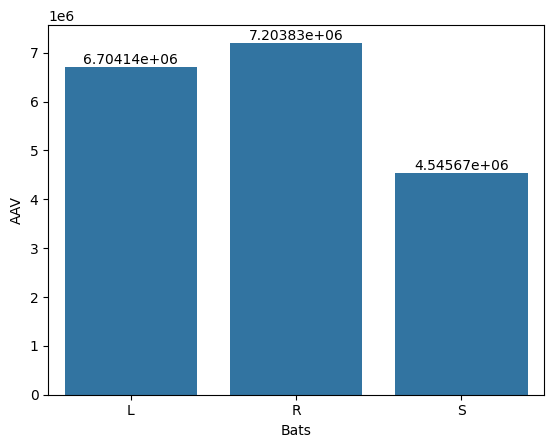

In [ ]:
ax = sns.barplot(handedness, x = 'Bats', y = 'AAV')
ax.bar_label(ax.containers[0]) #Allows me to label wiht the value

In [ ]:
pos_22thru24.groupby('Season')[['Total Salary','Years','AAV']].mean().reset_index() #Salary is relatively stable for 2021 and 2022, but not 2023

Season  Total Salary     Years           AAV
0  2021.0  2.871106e+07  2.000000  7.739443e+06
1  2022.0  2.852957e+07  1.922078  7.393163e+06
2  2023.0  1.728526e+07  1.333333  5.183364e+06

In [ ]:
pos_22thru24.groupby('Season')[['Total Salary']].max().reset_index() #Salary is relatively stable for 2021 and 2022, but not 2023

Season  Total Salary
0  2021.0   325000000.0
1  2022.0   360000000.0
2  2023.0   700000000.0

In [ ]:
pos_22thru24.groupby('Season')[['G']].mean().reset_index() #Averages for the games are about the same

Season           G
0  2021.0  109.265625
1  2022.0  103.974026
2  2023.0  104.541667

<Axes: xlabel='WAR', ylabel='AAV'>

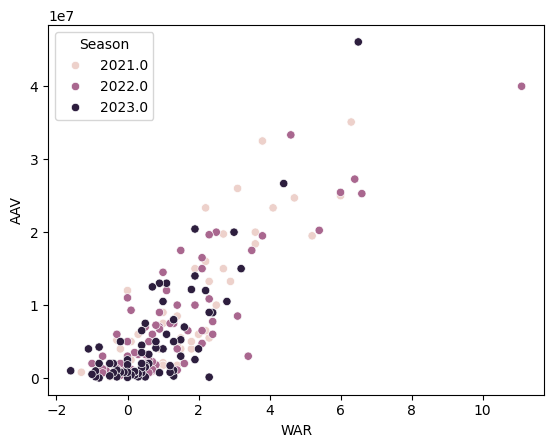

In [ ]:
sns.scatterplot(pos_22thru24, x = 'WAR', y = 'AAV', hue= "Season")

In [ ]:
war_and_salary = pos_22thru24.groupby('Season')[['WAR', 'AAV']].mean().reset_index()
war_and_salary

Season       WAR           AAV
0  2021.0  1.325000  7.739443e+06
1  2022.0  1.292208  7.393163e+06
2  2023.0  0.772222  5.183364e+06

<Axes: xlabel='WAR', ylabel='AAV'>

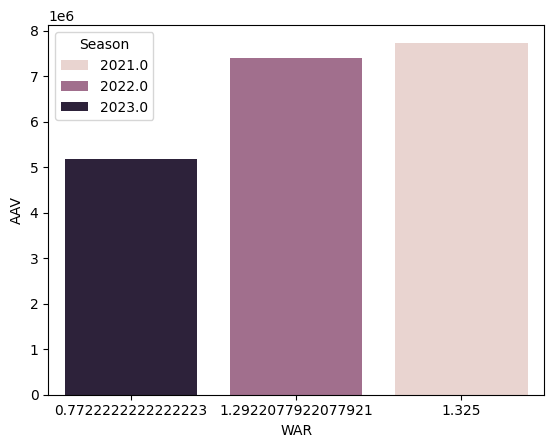

In [ ]:
sns.barplot(war_and_salary, x = 'WAR', y = "AAV", hue= "Season")

In [ ]:
pos_22thru24.loc[pos_22thru24['QO'].isna() == False].shape #THese are players who were extndes qualifying offers,

(19, 48)

In [ ]:
pos_22thru24.loc[(pos_22thru24['QO'].isna() == False) & (pos_22thru24['Years'] == 1)].shape # Only 3 position players accepted qualiftying offers from 2022-2024

(3, 48)

In [ ]:
3/19 #only 15% of players extedned thw QO accepted

0.15789473684210525

<Axes: xlabel='WAR', ylabel='Count'>

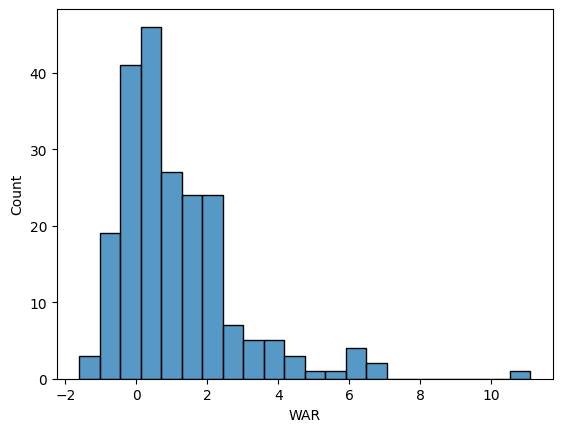

In [ ]:
sns.histplot(pos_22thru24, x = 'WAR')

NA imputing

In [ ]:
pos_22thru24.isna().any().sum()#There is one NA value

1

In [ ]:
pos_22thru24.isna().any().sort_values(ascending= False).head()#The QO col is the only columns with NA vales

QO             True
Unnamed: 0    False
wOBA          False
SB            False
AVG           False
dtype: bool

In [ ]:
pos_22thru24['QO'].isna().sum()#194 players were ext

194

In [ ]:
pos_22thru24['QO'] = pos_22thru24['QO'].fillna(0)
pos_22thru24

Unnamed: 0               Name          Pos Bats Thr Prev Team  Age  \
0            0      Carlos Correa           SS    R   R       HOU   27   
1            1      Marcus Semien        2B/SS    R   R       TOR   31   
2            2     Starling Marte     CF/RF/LF    R   R       OAK   33   
3            3    Freddie Freeman           1B    L   R       ATL   32   
4            4        Javier Báez        SS/2B    R   R       NYM   29   
..         ...                ...          ...  ...  ..       ...  ...   
69          69        Jared Walsh           1B    L   L       LAA   30   
70          70        Austin Nola            C    R   R       SDP   34   
71          71         Eric Haase            C    R   R       CLE   31   
72          72  Enrique Hernández  2B/SS/3B/OF    R   R       LAD   32   
73          73   Jurickson Profar     LF/RF/1B    S   R       SDP   31   

    Service Time          QO Signing Team  Years  Total Salary          AAV  \
0          6.119  18400000.0          MIN    1.0    35100000.0  35100000.00   
1          7.118  18400000.0          TEX    7.0   175000000.0  25000000.00   
2          8.162         0.0          NYM    4.0    78000000.0  19500000.00   
3         11.033  18400000.0          LAD    6.0   162000000.0  24700000.00   
4          6.089         0.0          DET    6.0   140000000.0  23333333.33   
..           ...         ...          ...    ...           ...          ...   
69         3.114         0.0          TEX    1.0      181452.0    181452.00   
70         4.045         0.0          KCR    1.0      975000.0    975000.00   
71         3.058         0.0          MIL    1.0      516129.0    516129.00   
72         9.054         0.0          LAD    1.0     4000000.0   4000000.00   
73         9.165         0.0          SDP    1.0     1000000.0   1000000.00   

    playerid  Season      G     AB     PA      H     1B    2B   3B    HR  \
0      14162  2021.0  148.0  555.0  640.0  155.0   94.0  34.0  1.0  26.0   
1      12533  2021.0  162.0  652.0  724.0  173.0   87.0  39.0  2.0  45.0   
2       9241  2021.0  120.0  467.0  526.0  145.0  103.0  27.0  3.0  12.0   
3       5361  2021.0  159.0  600.0  695.0  180.0  122.0  25.0  2.0  31.0   
4      12979  2021.0  138.0  502.0  547.0  133.0   82.0  18.0  2.0  31.0   
..       ...     ...    ...    ...    ...    ...    ...   ...  ...   ...   
69     18607  2023.0   39.0  104.0  116.0   13.0    5.0   4.0  0.0   4.0   
70     15941  2023.0   52.0  130.0  154.0   19.0   15.0   3.0  0.0   1.0   
71     14111  2023.0   89.0  274.0  293.0   55.0   42.0   8.0  1.0   4.0   
72     10472  2023.0  140.0  465.0  508.0  110.0   76.0  23.0  0.0  11.0   
73     10815  2023.0  125.0  459.0  521.0  111.0   73.0  27.0  2.0   9.0   

        R    RBI    BB   IBB    SB    AVG    BB%     K%    OBP    SLG    OPS  \
0   104.0   92.0  75.0   2.0   0.0  0.279  0.117  0.181  0.366  0.485  0.850   
1   115.0  102.0  66.0   0.0  15.0  0.265  0.091  0.202  0.334  0.538  0.873   
2    89.0   55.0  43.0   2.0  47.0  0.310  0.082  0.188  0.383  0.458  0.841   
3   120.0   83.0  85.0  15.0   8.0  0.300  0.122  0.154  0.393  0.503  0.896   
4    80.0   87.0  28.0   2.0  18.0  0.265  0.051  0.336  0.319  0.494  0.813   
..    ...    ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
69   10.0   11.0  11.0   0.0   0.0  0.125  0.095  0.388  0.216  0.279  0.494   
70    9.0    8.0  18.0   0.0   0.0  0.146  0.117  0.201  0.260  0.192  0.452   
71   22.0   26.0  17.0   1.0   4.0  0.201  0.058  0.276  0.247  0.281  0.528   
72   57.0   61.0  34.0   1.0   4.0  0.237  0.067  0.191  0.289  0.357  0.646   
73   55.0   46.0  50.0   0.0   1.0  0.242  0.096  0.173  0.321  0.368  0.689   

      ISO  BABIP   wOBA  xwOBA   wRC+  BABIP.1    LD%    GB%    FB%  Soft%  \
0   0.205  0.308  0.364  0.373  133.0    0.308  0.236  0.416  0.348  0.169   
1   0.273  0.276  0.368  0.336  131.0    0.276  0.208  0.310  0.481  0.151   
2   0.148  0.372  0.364  0.347  132.0    0.372  0.211  0.5

In [ ]:
#pos_22thru24.isna().any().sort_values(ascending= False)#There are no NA values now

##Postion player exploration

In [ ]:
batter_eda_cols = ['AAV','Service Time', 'G',	'AB',	'PA',	'H',	'1B',	'2B',	'3B',	'HR',	'R',	'RBI',	'BB',	'IBB',	'SB',	'AVG',	'BB%',	'K%',	'OBP',	'SLG',	'OPS',	'ISO',
                 'BABIP',	'wOBA',	'xwOBA',	'wRC+',	'LD%',	'GB%',	'FB%',	'Soft%',	'Med%',	'Hard%',	'WPA',	'WAR']

In [ ]:
pos_eda_df = pos_22thru24[batter_eda_cols]
pos_eda_df.head()

AAV  Service Time      G     AB     PA      H     1B    2B   3B  \
0  35100000.00         6.119  148.0  555.0  640.0  155.0   94.0  34.0  1.0   
1  25000000.00         7.118  162.0  652.0  724.0  173.0   87.0  39.0  2.0   
2  19500000.00         8.162  120.0  467.0  526.0  145.0  103.0  27.0  3.0   
3  24700000.00        11.033  159.0  600.0  695.0  180.0  122.0  25.0  2.0   
4  23333333.33         6.089  138.0  502.0  547.0  133.0   82.0  18.0  2.0   

     HR      R    RBI    BB   IBB    SB    AVG    BB%     K%    OBP    SLG  \
0  26.0  104.0   92.0  75.0   2.0   0.0  0.279  0.117  0.181  0.366  0.485   
1  45.0  115.0  102.0  66.0   0.0  15.0  0.265  0.091  0.202  0.334  0.538   
2  12.0   89.0   55.0  43.0   2.0  47.0  0.310  0.082  0.188  0.383  0.458   
3  31.0  120.0   83.0  85.0  15.0   8.0  0.300  0.122  0.154  0.393  0.503   
4  31.0   80.0   87.0  28.0   2.0  18.0  0.265  0.051  0.336  0.319  0.494   

     OPS    ISO  BABIP   wOBA  xwOBA   wRC+    LD%    GB%    FB%  Soft%  \
0  0.850  0.205  0.308  0.364  0.373  133.0  0.236  0.416  0.348  0.169   
1  0.873  0.273  0.276  0.368  0.336  131.0  0.208  0.310  0.481  0.151   
2  0.841  0.148  0.372  0.364  0.347  132.0  0.211  0.548  0.241  0.189   
3  0.896  0.203  0.321  0.379  0.416  136.0  0.244  0.430  0.325  0.117   
4  0.813  0.229  0.352  0.344  0.321  117.0  0.185  0.470  0.345  0.190   

    Med%  Hard%   WPA  WAR  
0  0.466  0.365  1.85  6.3  
1  0.489  0.360  1.32  6.0  
2  0.482  0.329  3.78  5.2  
3  0.499  0.384  3.67  4.7  
4  0.442  0.368  1.47  4.1

<Axes: >

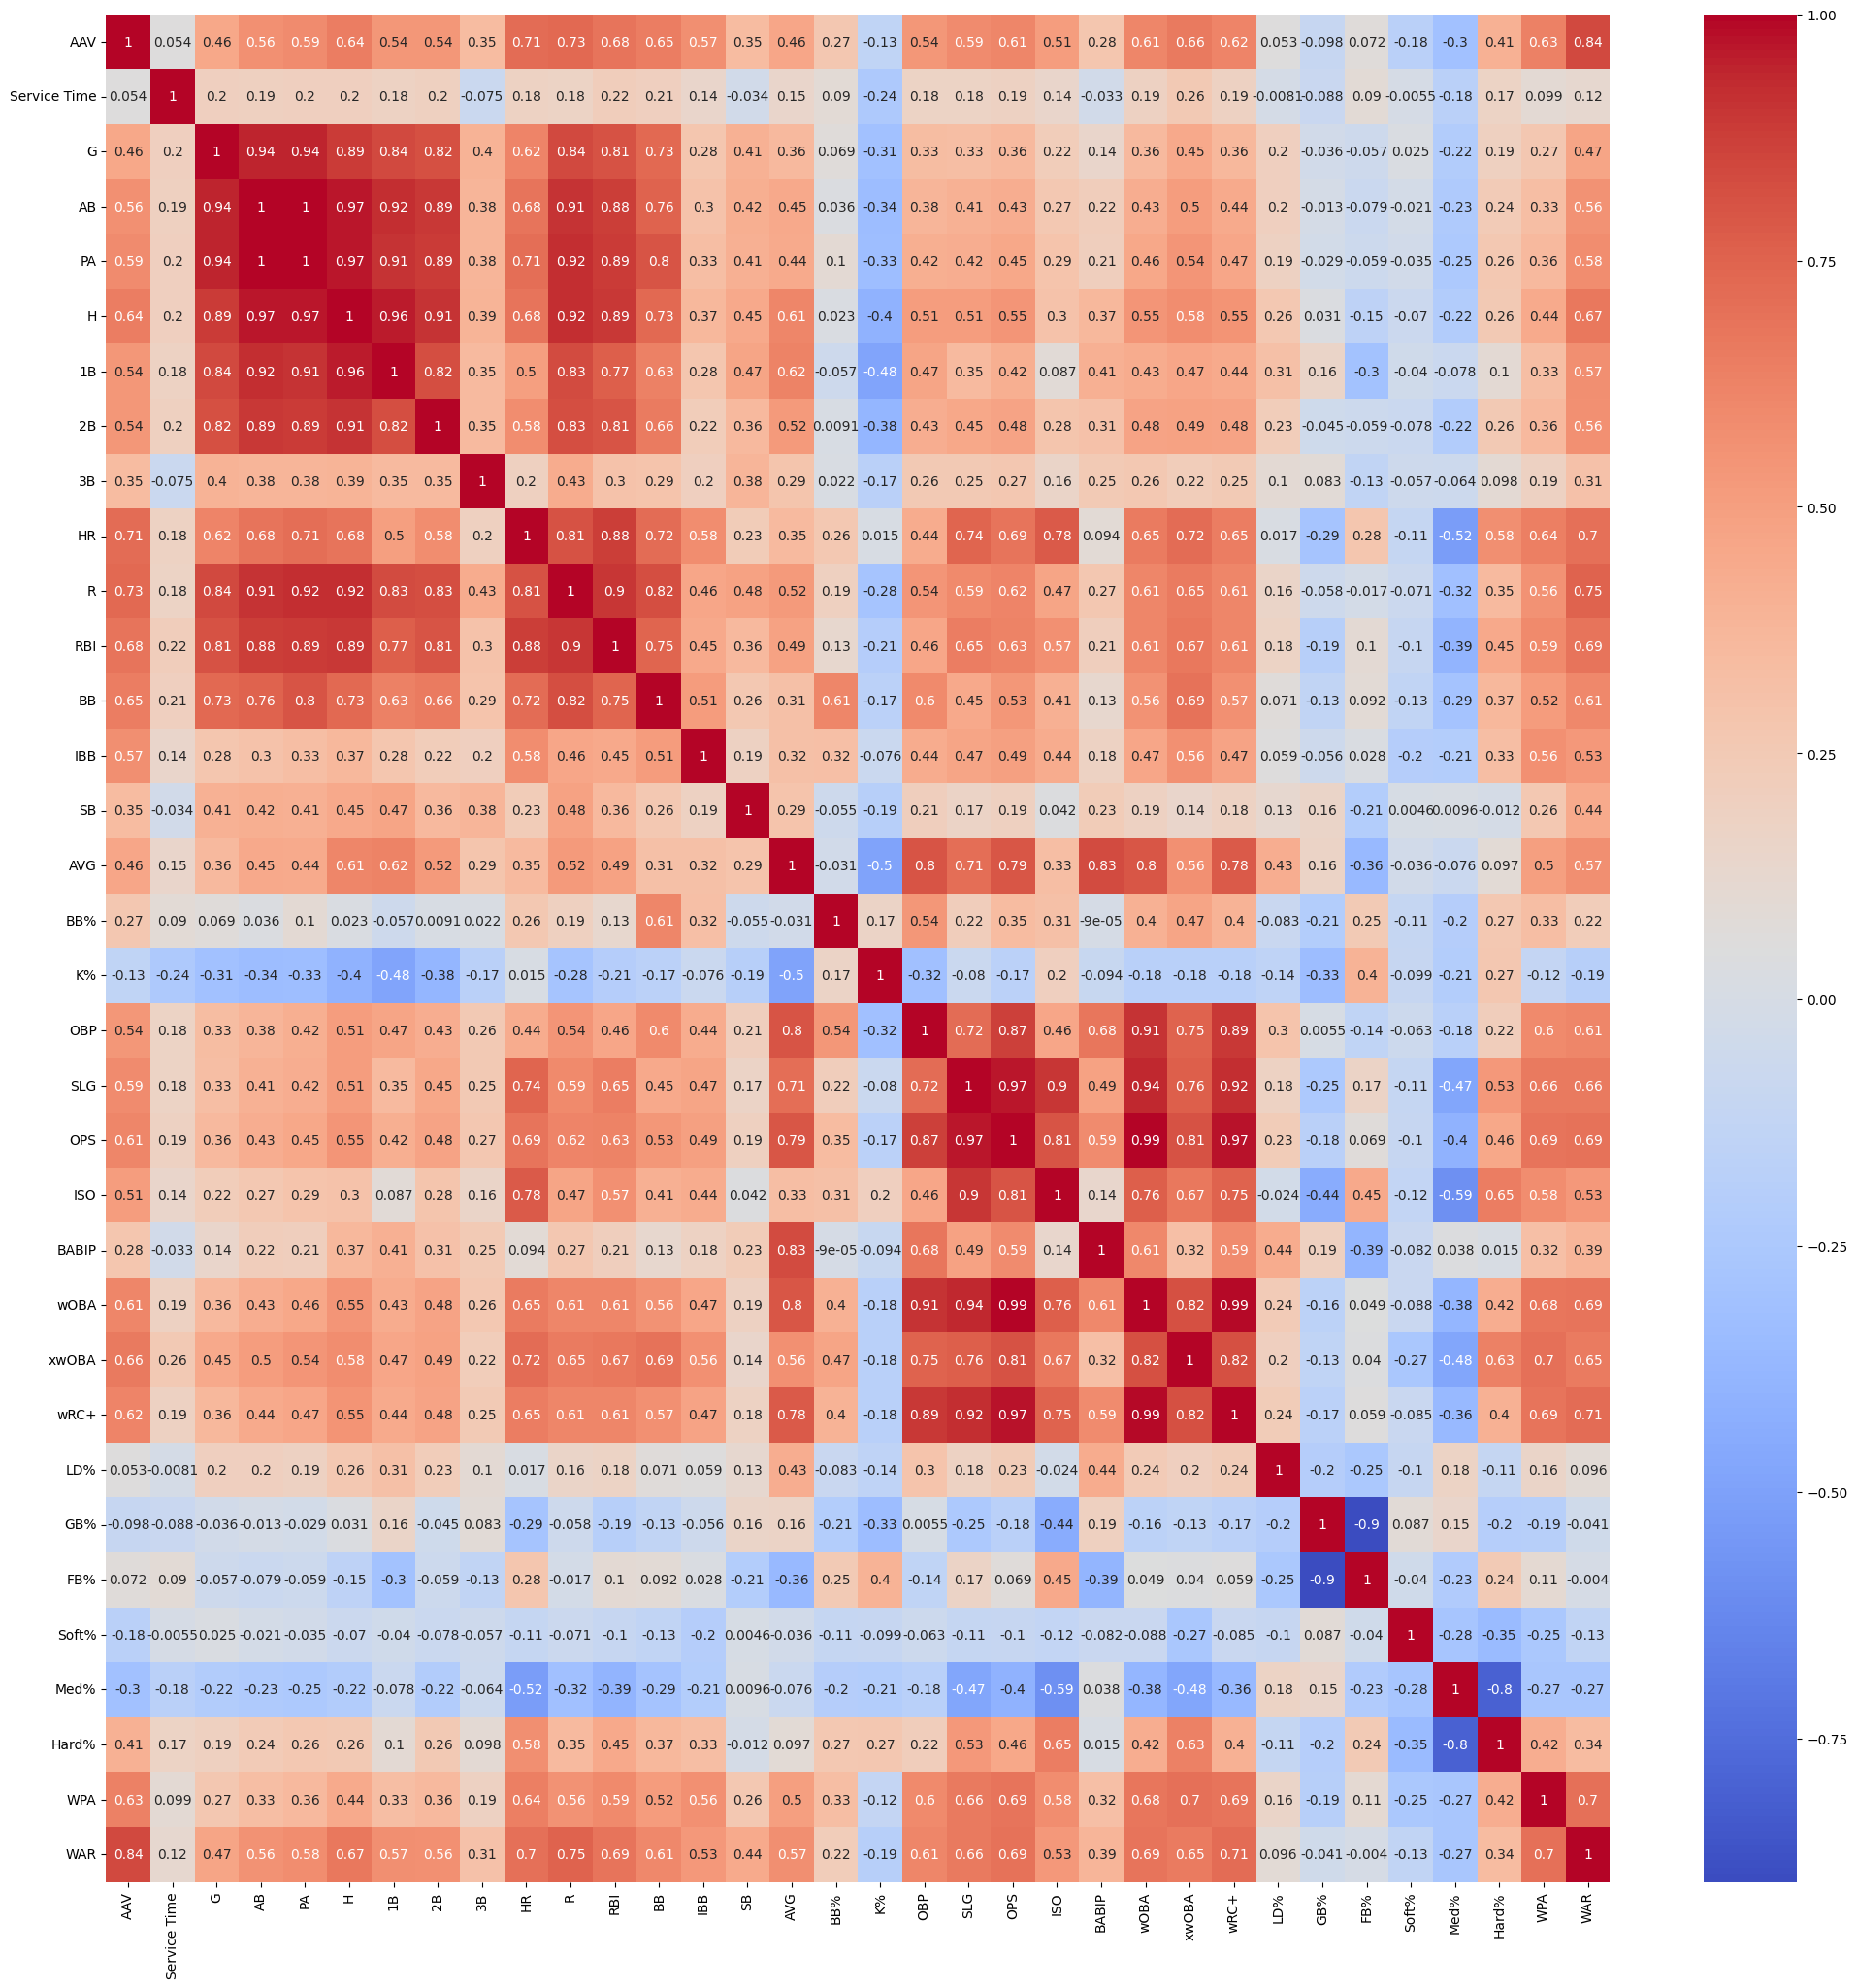

In [ ]:
import matplotlib.pyplot as plt
map = pos_eda_df.corr()
mask = pos_eda_df.isna()
plt.figure(figsize=(25,25))
sns.heatmap(map, cmap ='coolwarm', annot=True)

In [ ]:
pos_aav_cor = (map['AAV'].reset_index()).rename(columns = {'index': 'variable',
                                                           'AAV': 'corr'}).sort_values(by = 'corr', ascending= False).reset_index().drop(columns = 'index')
pos_aav_cor #This is a df sorted by correlation between WAR and all other variabels

variable      corr
0            AAV  1.000000
1            WAR  0.841123
2              R  0.730505
3             HR  0.713662
4            RBI  0.682886
5          xwOBA  0.664715
6             BB  0.646005
7              H  0.644698
8            WPA  0.633783
9           wRC+  0.621653
10           OPS  0.614396
11          wOBA  0.608564
12           SLG  0.592499
13            PA  0.591304
14           IBB  0.573506
15            AB  0.564311
16            1B  0.539825
17            2B  0.537744
18           OBP  0.537246
19           ISO  0.508403
20           AVG  0.459809
21             G  0.455770
22         Hard%  0.405888
23            3B  0.345812
24            SB  0.345180
25         BABIP  0.276165
26           BB%  0.268518
27           FB%  0.072096
28  Service Time  0.053971
29           LD%  0.053008
30           GB% -0.097793
31            K% -0.133908
32         Soft% -0.175604
33          Med% -0.303918

Text(0.5, 1.0, 'Variable Correlation with AAV')

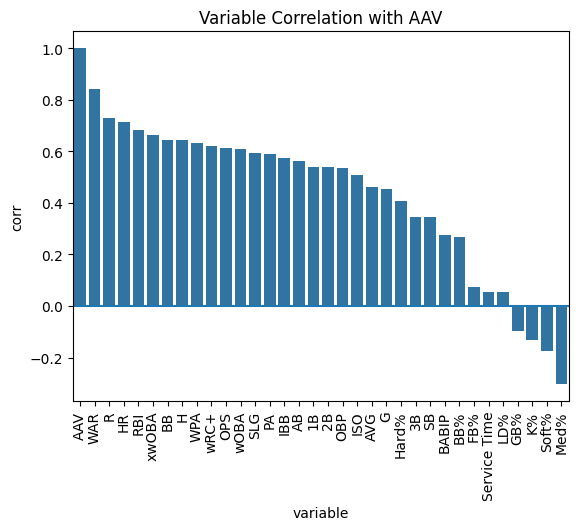

In [ ]:
ax = sns.barplot(pos_aav_cor, x = 'variable', y = 'corr')
plt.xticks(rotation=90)
plt.axhline(0)#By adding a command here
ax.set_title('Variable Correlation with AAV')

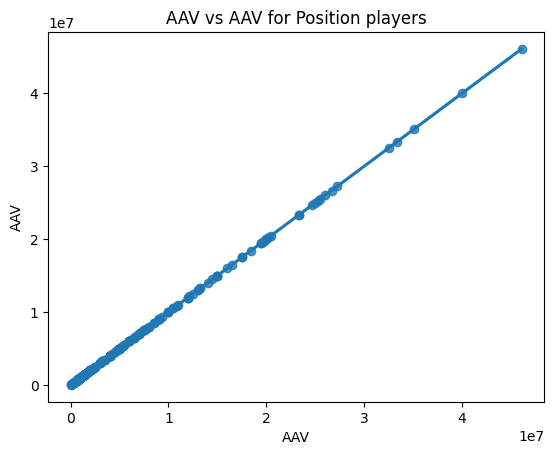

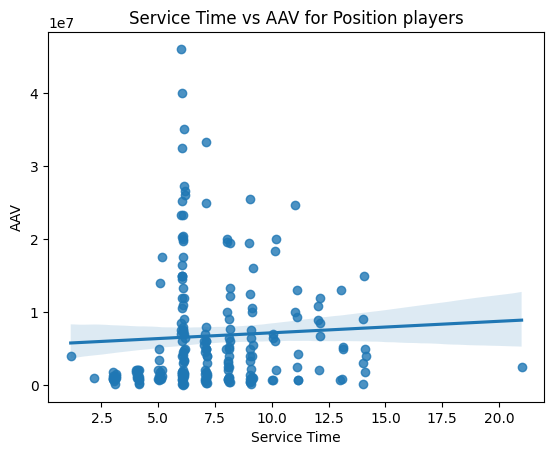

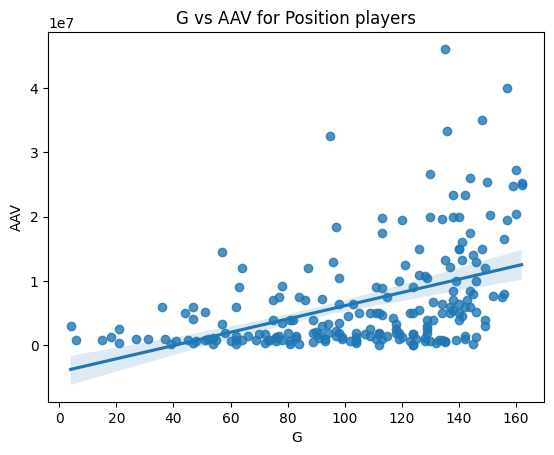

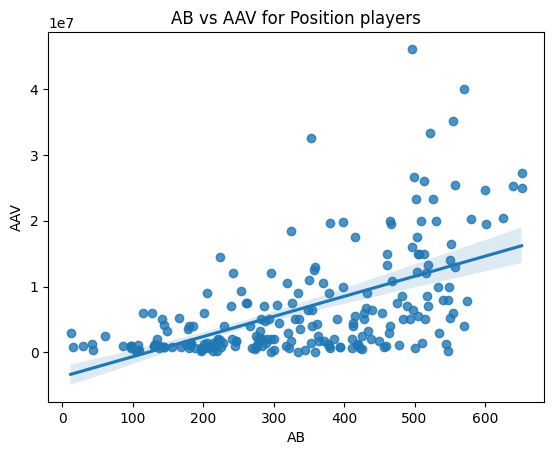

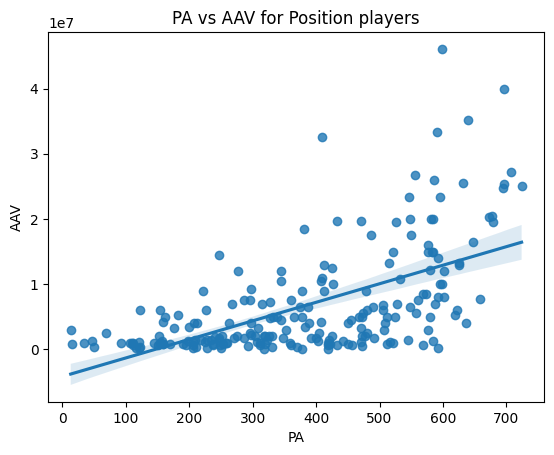

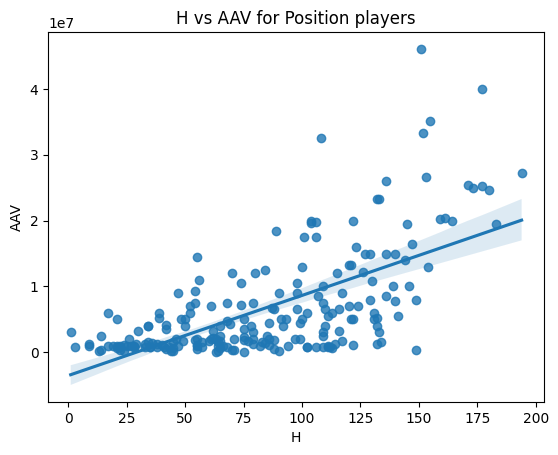

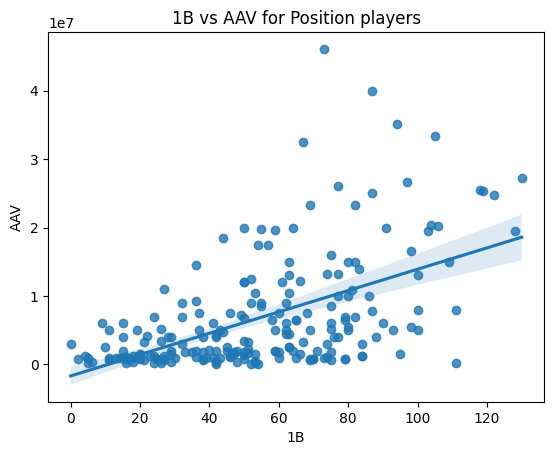

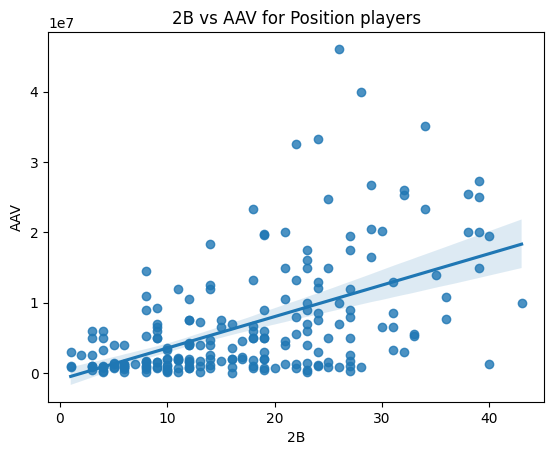

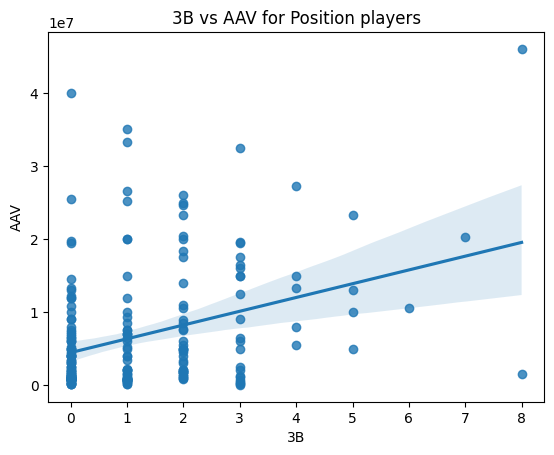

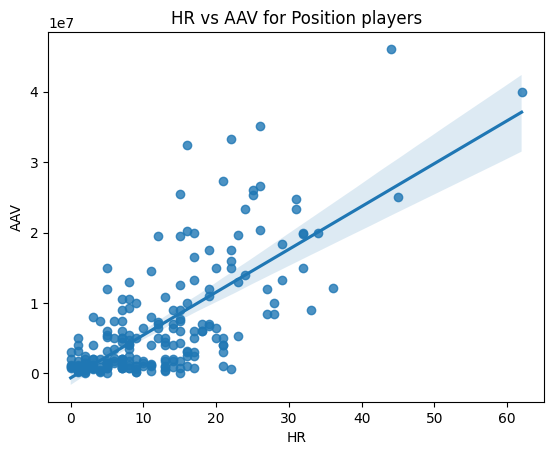

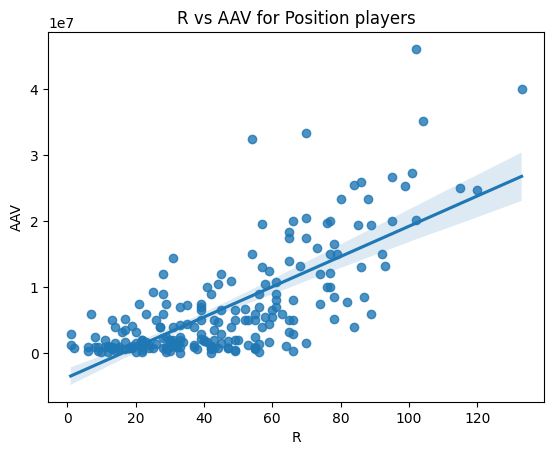

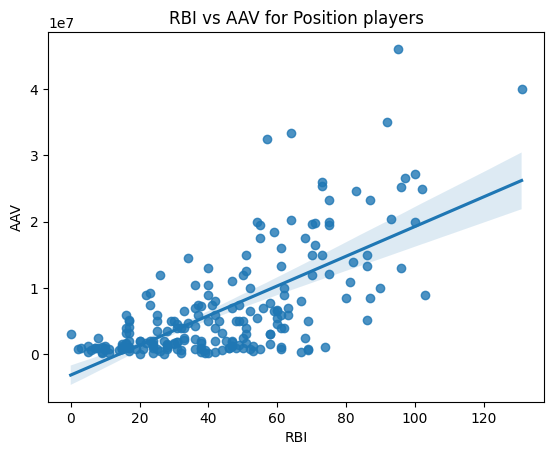

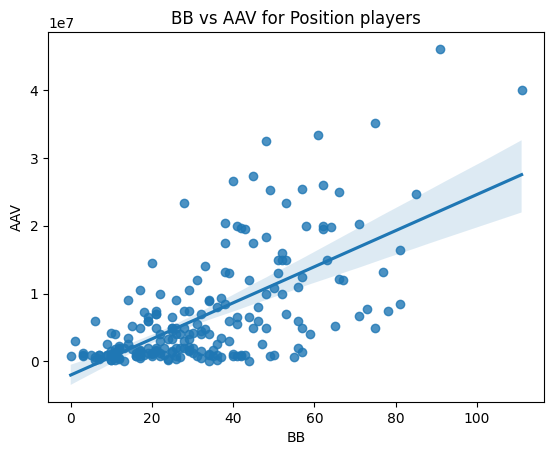

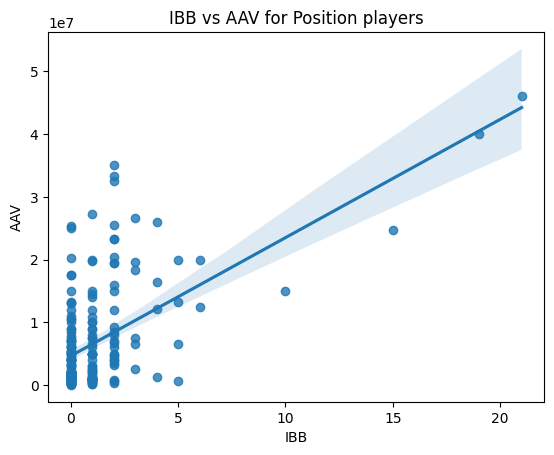

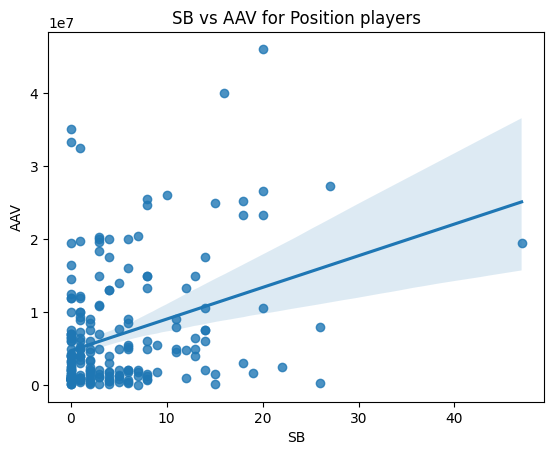

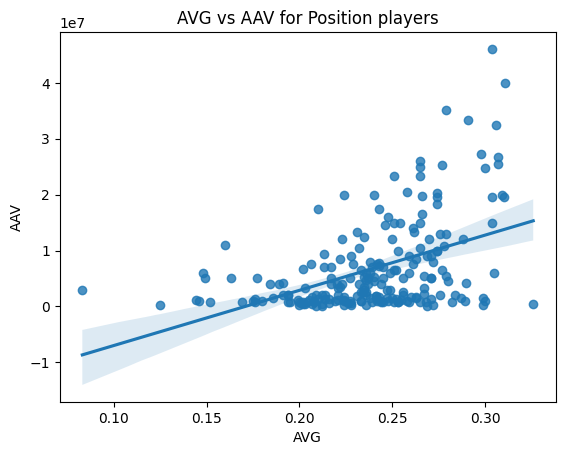

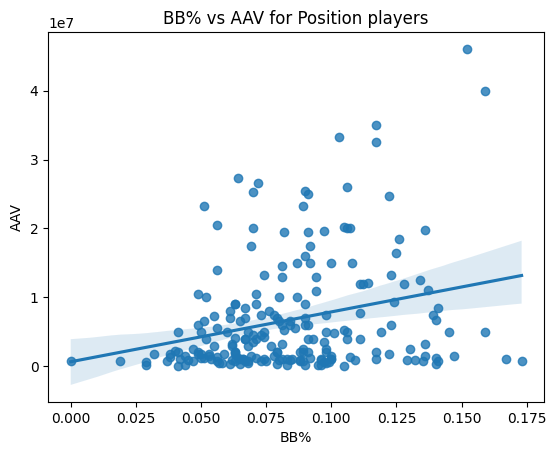

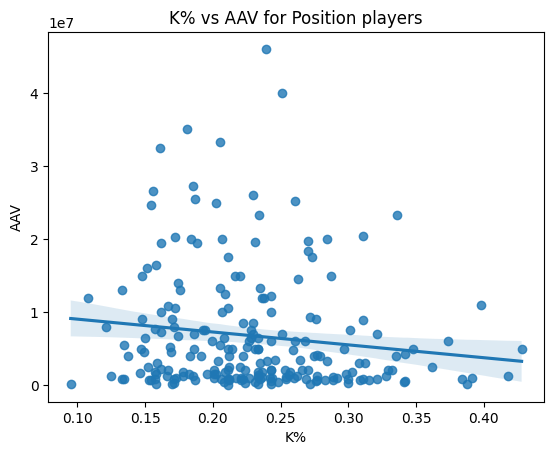

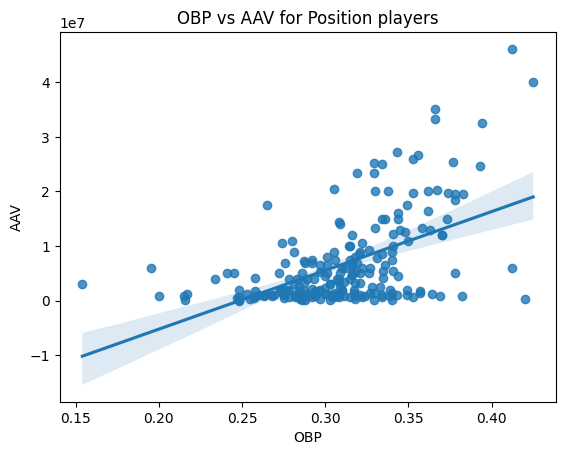

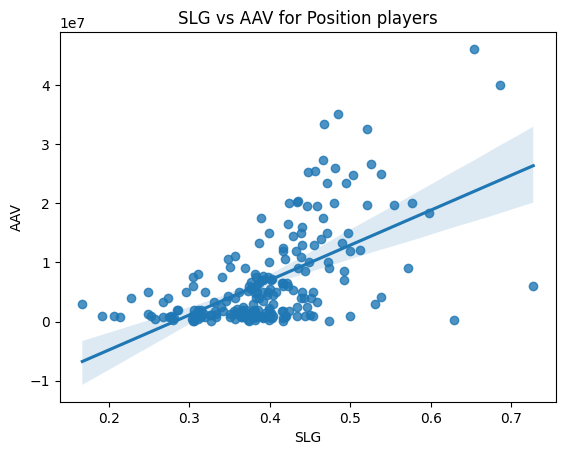

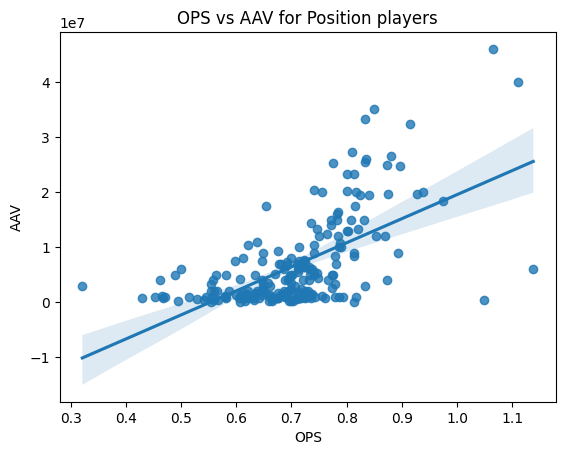

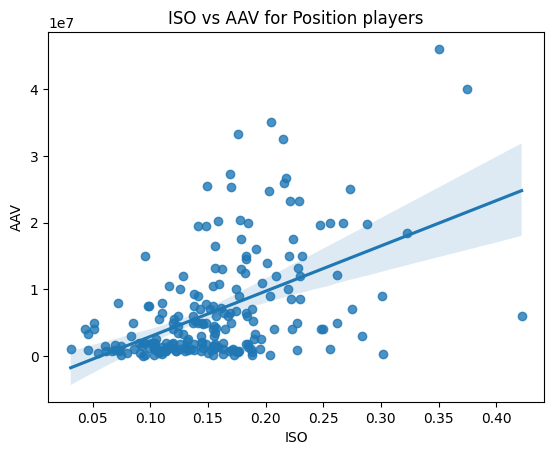

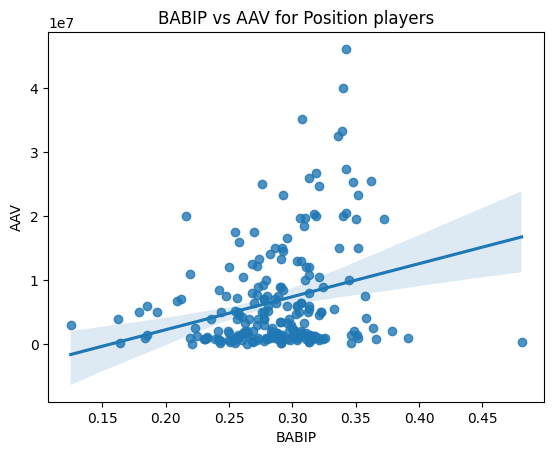

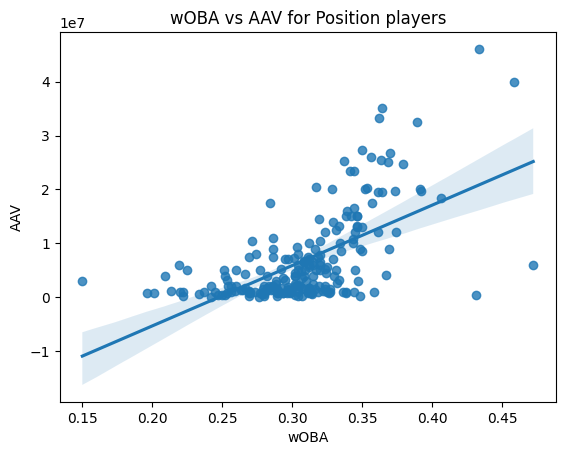

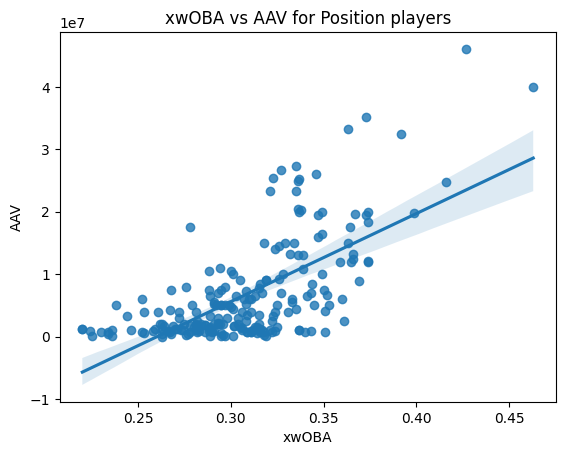

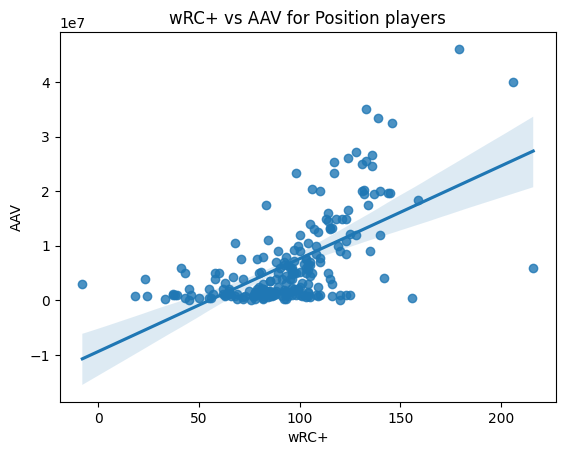

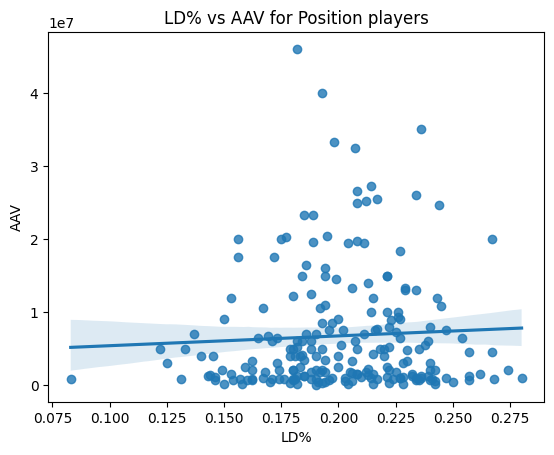

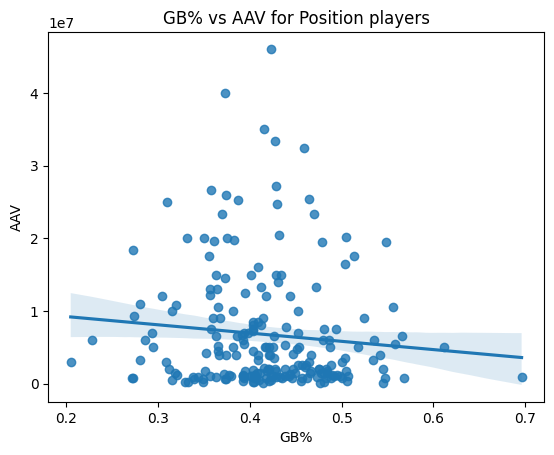

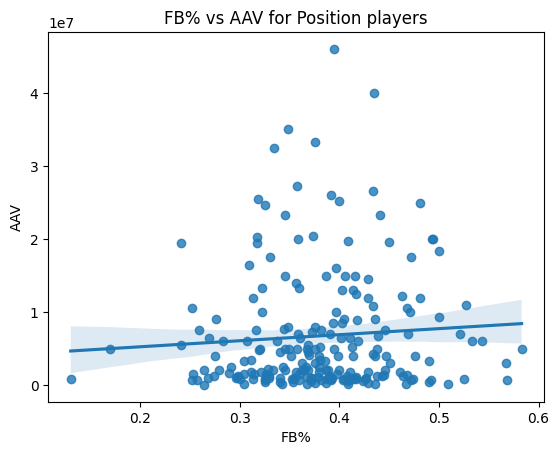

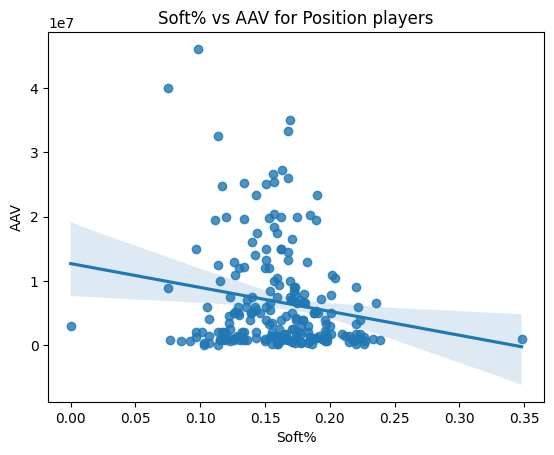

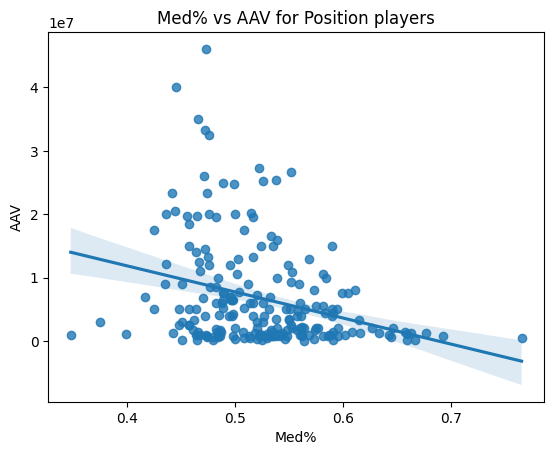

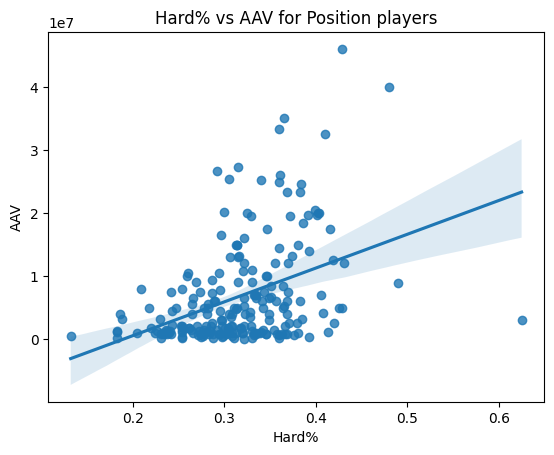

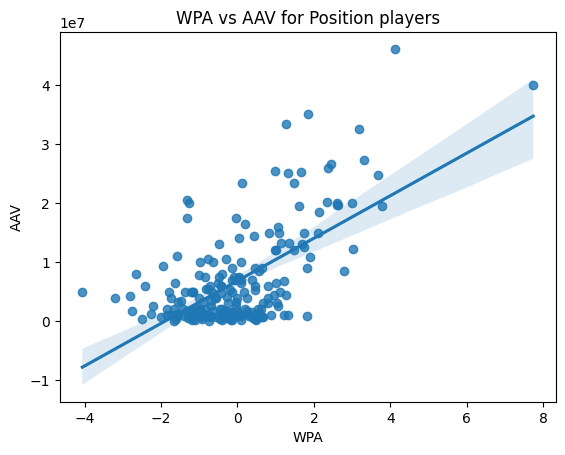

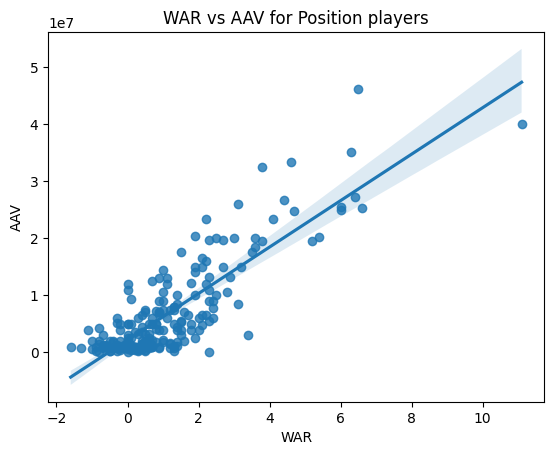

In [ ]:
for i in pos_eda_df.columns:
  ax = sns.regplot(pos_eda_df, x = i, y= 'AAV', fit_reg= True, )
  ax.set_title(f'{i} vs AAV for Position players')
  plt.show()

Text(0.5, 1.0, 'WAR vs AAV for Position players')

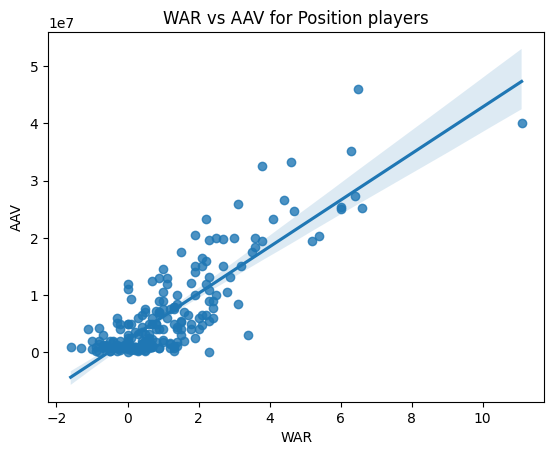

In [ ]:
ax = sns.regplot(pos_eda_df, x = 'WAR', y= 'AAV', fit_reg= True, )
ax.set_title('WAR vs AAV for Position players')

##Pitcher exploration

In [ ]:
pitcher_eda_cols = ['AAV', 'W',	'L',	'SV',	'G','GS',	'IP',	'K/9',	'BB/9',	'HR/9',	'BABIP',	'LOB%',	'H',	'BB',	'SO',	'WP',	'K%',	'BB%','AVG',	'WHIP',	'ERA',	'FIP',	'E-F',	'xFIP',	'GB/FB',
                   'LD%',	'GB%',	'FB%',	'Soft%',	'Med%',	'Hard%',	'WPA',	'WAR']

In [ ]:
pitch_eda_df = pitchers_22thru24[pitcher_eda_cols]
pitch_eda_df.head()

AAV     W    L   SV     G    GS     IP    K/9  BB/9  HR/9  BABIP  \
0  43333333.33  15.0  4.0  0.0  30.0  30.0  179.1  11.84  1.81  1.15  0.247   
1  22000000.00  13.0  5.0  0.0  24.0  24.0  132.2  12.55  2.44  0.88  0.267   
2  22000000.00  14.0  6.0  0.0  33.0  33.0  192.0  10.64  2.34  0.94  0.274   
3   8846154.00  13.0  8.0  0.0  32.0  31.0  157.2  10.56  2.68  1.08  0.363   
4  23000000.00  13.0  7.0  0.0  32.0  32.0  193.1  11.54  2.42  1.54  0.268   

    LOB%      H    BB     SO   WP     K%    BB%    AVG  WHIP   ERA   FIP  \
0  0.843  119.0  36.0  236.0  2.0  0.341  0.052  0.184  0.86  2.46  2.97   
1  0.822   91.0  36.0  185.0  7.0  0.346  0.067  0.186  0.96  2.37  2.65   
2  0.784  150.0  50.0  227.0  7.0  0.293  0.065  0.208  1.04  2.81  3.00   
3  0.689  172.0  47.0  185.0  0.0  0.274  0.070  0.275  1.39  4.74  3.32   
4  0.901  150.0  52.0  248.0  5.0  0.321  0.067  0.209  1.04  2.84  3.69   

    E-F  xFIP  GB/FB    LD%    GB%    FB%  Soft%   Med%  Hard%   WPA  WAR  
0 -0.52  3.24   0.69  0.182  0.335  0.483  0.170  0.484  0.345  4.37  5.4  
1 -0.28  3.17   0.84  0.173  0.377  0.450  0.201  0.523  0.276  2.50  5.0  
2 -0.19  3.28   1.15  0.216  0.419  0.365  0.162  0.496  0.342  2.69  4.8  
3  1.42  3.43   1.26  0.224  0.432  0.343  0.166  0.556  0.279 -0.55  3.9  
4 -0.85  3.36   0.84  0.186  0.372  0.442  0.141  0.510  0.350  3.45  3.9

<Axes: >

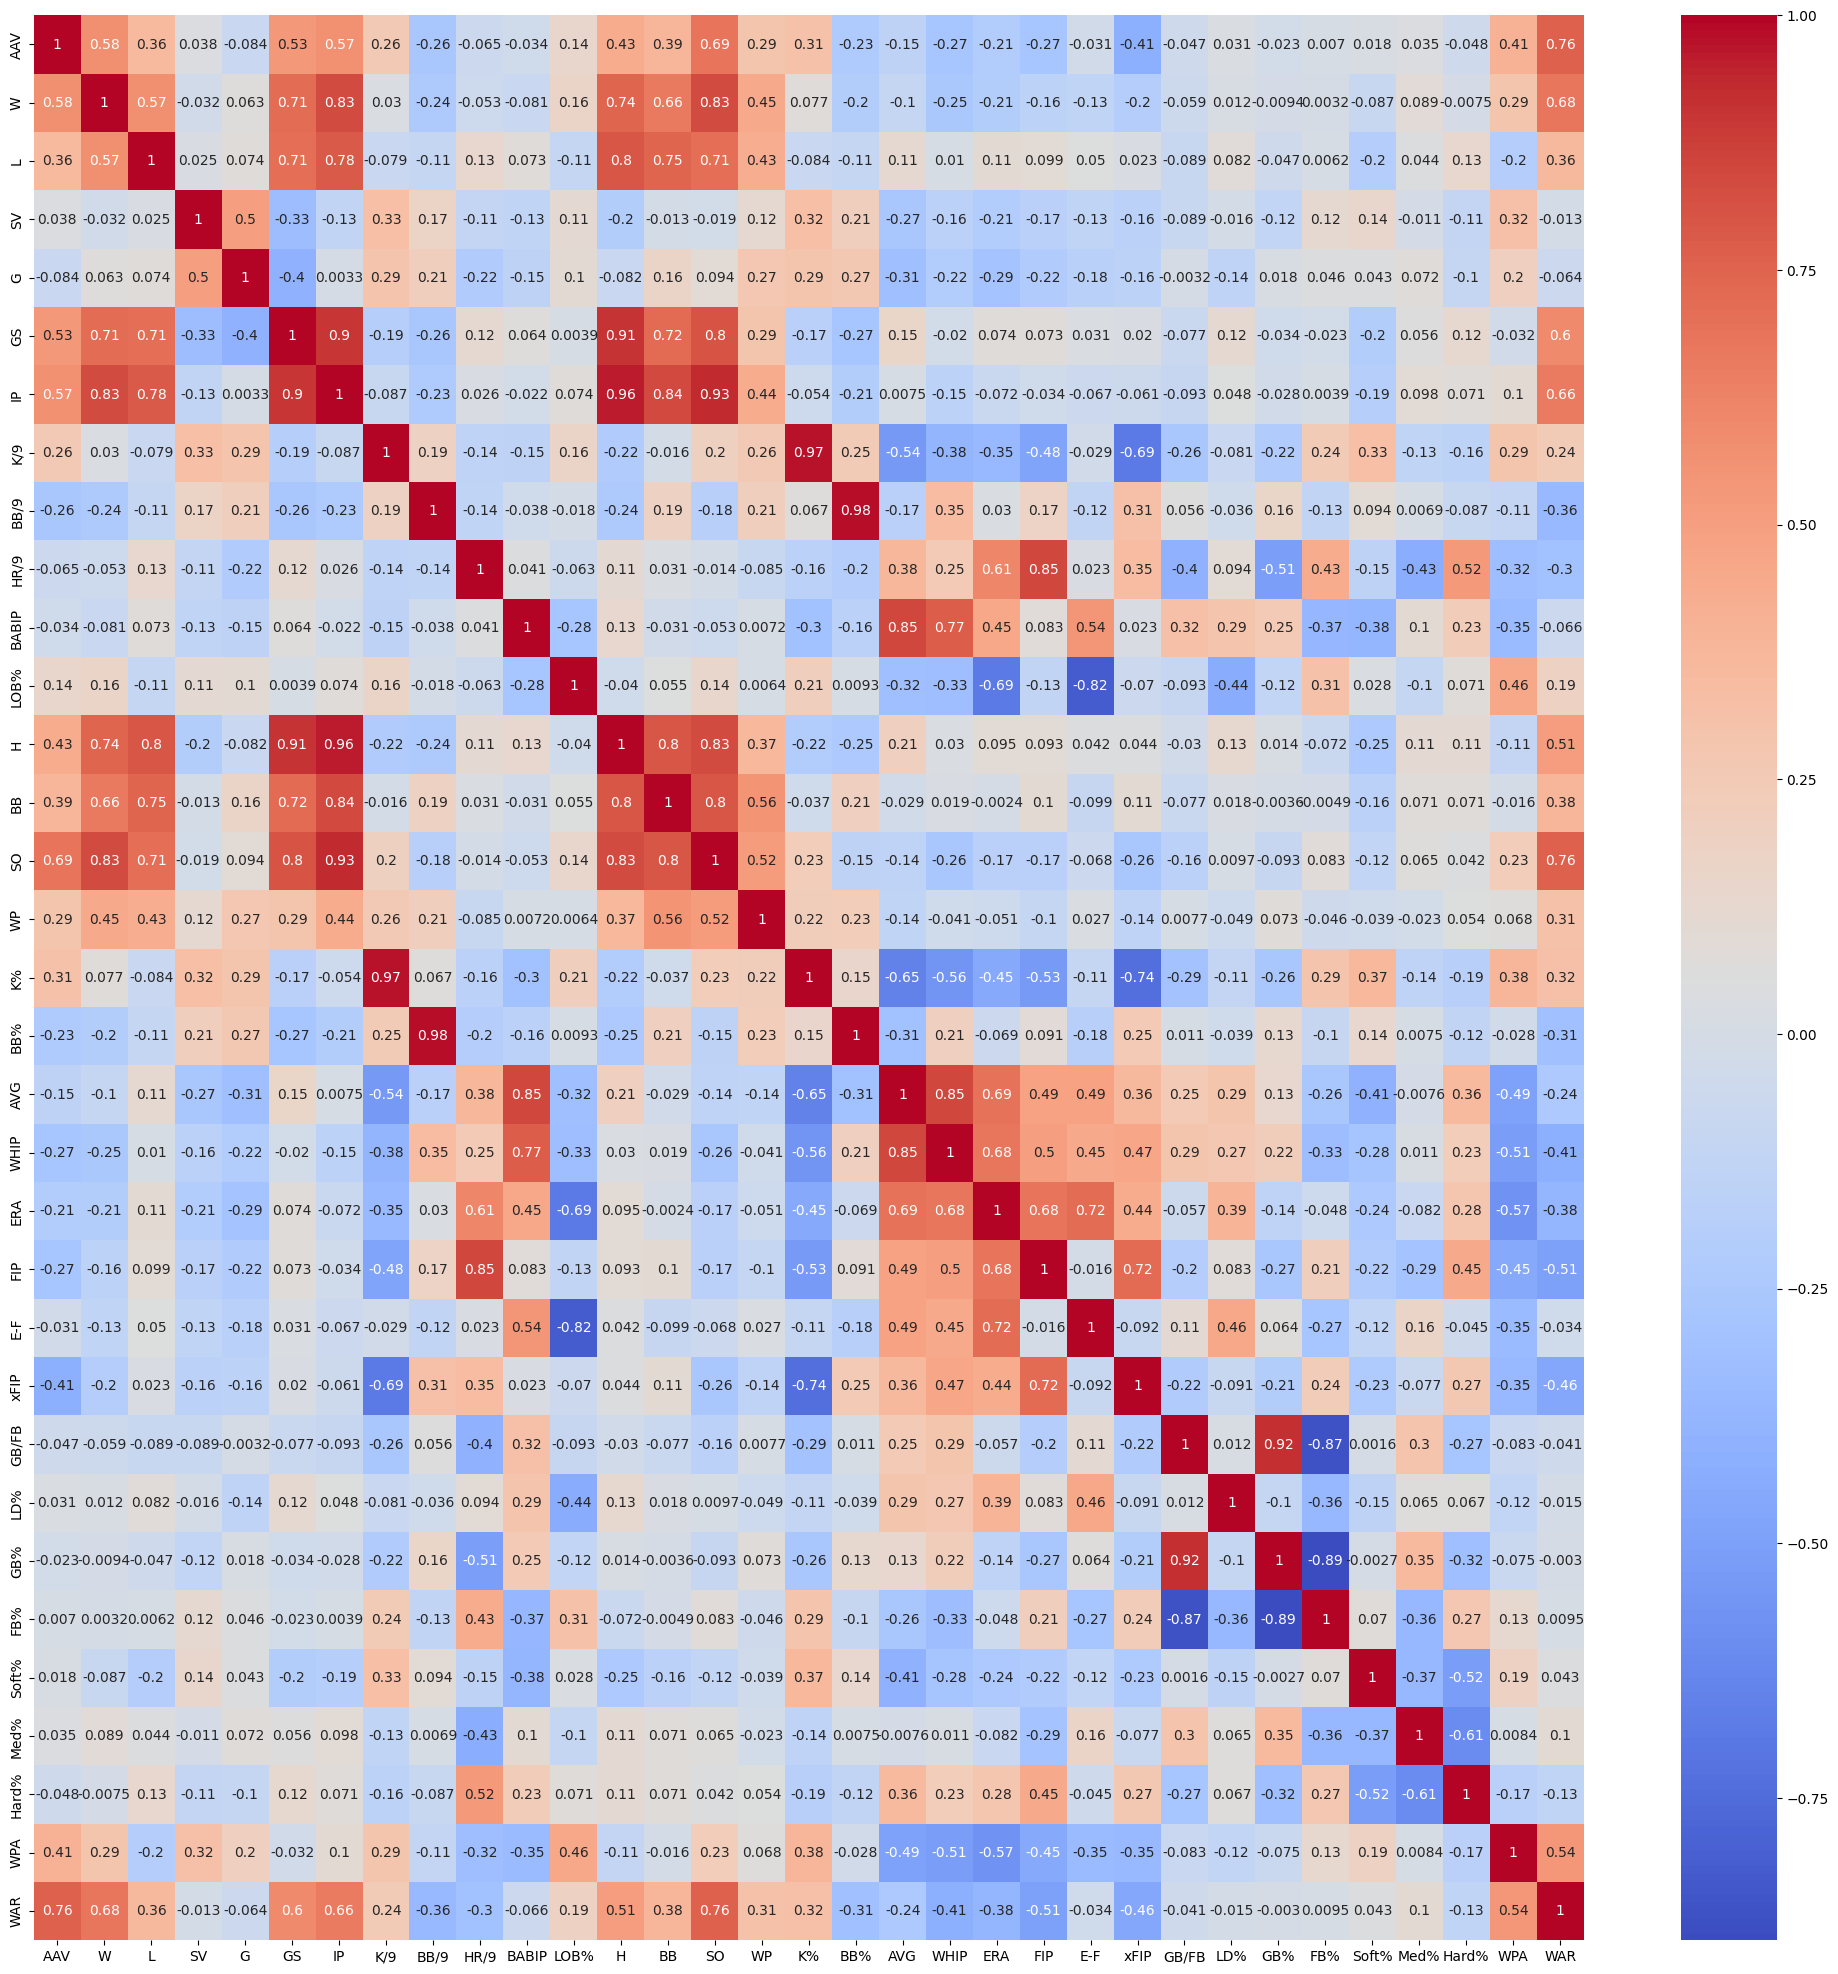

In [ ]:
import matplotlib.pyplot as plt
map = pitch_eda_df.corr()
mask = pitch_eda_df.isna()
plt.figure(figsize=(25,25))
sns.heatmap(map, cmap ='coolwarm', annot=True)

In [ ]:
pitch_aav_cor = (map['AAV'].reset_index()).rename(columns = {'index': 'variable',
                                                           'AAV': 'corr'}).sort_values(by = 'corr', ascending= False).reset_index().drop(columns = 'index')
pitch_aav_cor #This is a df sorted by correlation between WAR and all other variabels

variable      corr
0       AAV  1.000000
1       WAR  0.761755
2        SO  0.689359
3         W  0.578157
4        IP  0.567860
5        GS  0.528609
6         H  0.432171
7       WPA  0.407508
8        BB  0.385964
9         L  0.356153
10       K%  0.309148
11       WP  0.289001
12      K/9  0.257700
13     LOB%  0.138731
14       SV  0.037516
15     Med%  0.034734
16      LD%  0.031047
17    Soft%  0.018165
18      FB%  0.007017
19      GB% -0.022550
20      E-F -0.031099
21    BABIP -0.033676
22    GB/FB -0.047331
23    Hard% -0.048032
24     HR/9 -0.064798
25        G -0.084426
26      AVG -0.150055
27      ERA -0.212726
28      BB% -0.232122
29     BB/9 -0.259423
30      FIP -0.273718
31     WHIP -0.273787
32     xFIP -0.411303

Text(0.5, 1.0, 'Variable Correlation with AAV')

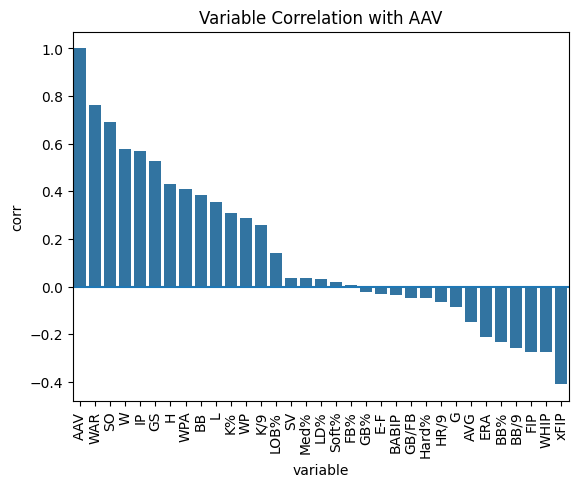

In [ ]:
ax = sns.barplot(pitch_aav_cor, x = 'variable', y = 'corr')
plt.xticks(rotation=90)
plt.axhline(0)#By adding a command here
ax.set_title('Variable Correlation with AAV')

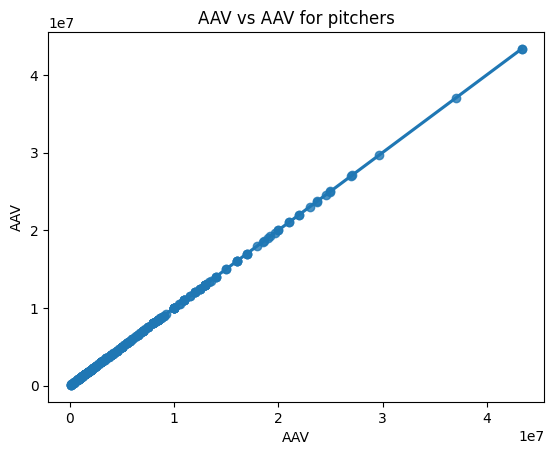

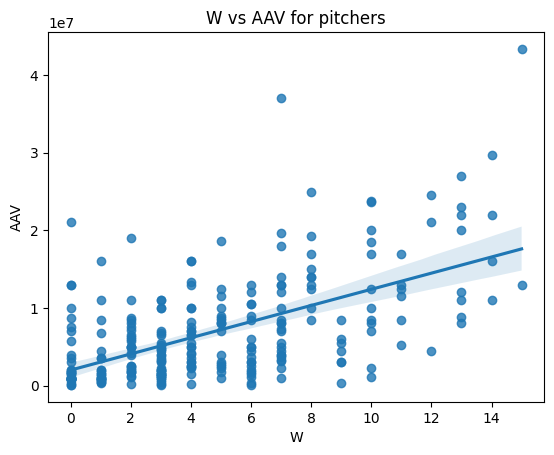

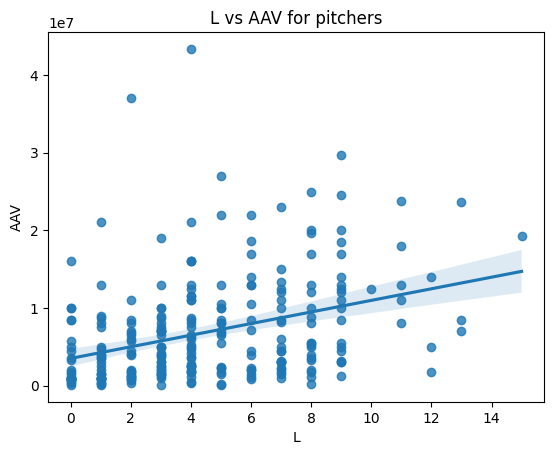

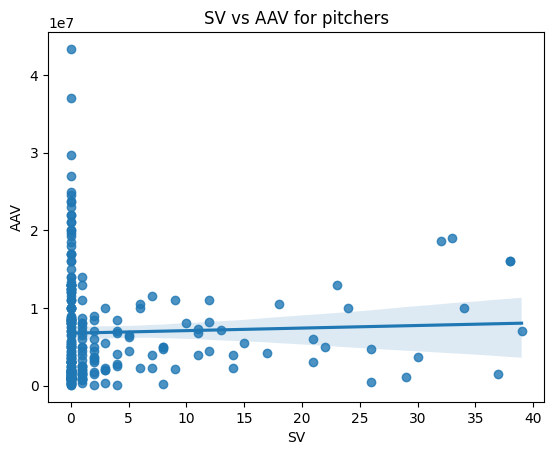

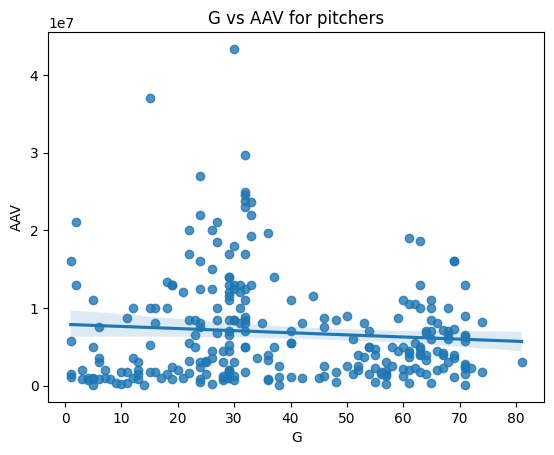

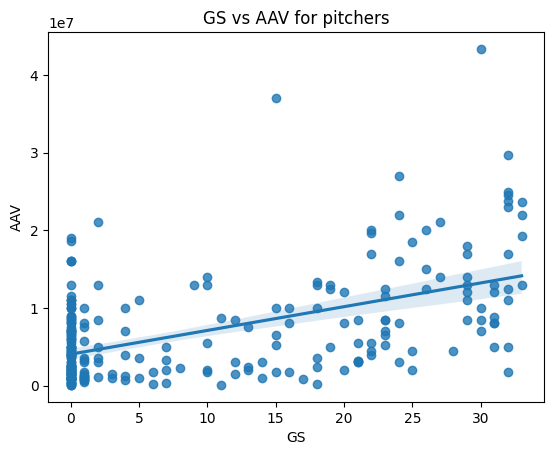

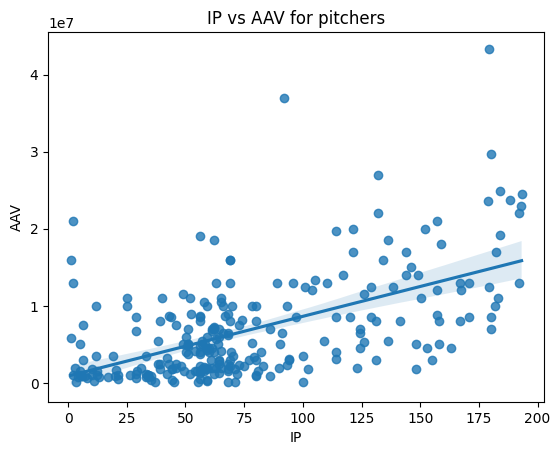

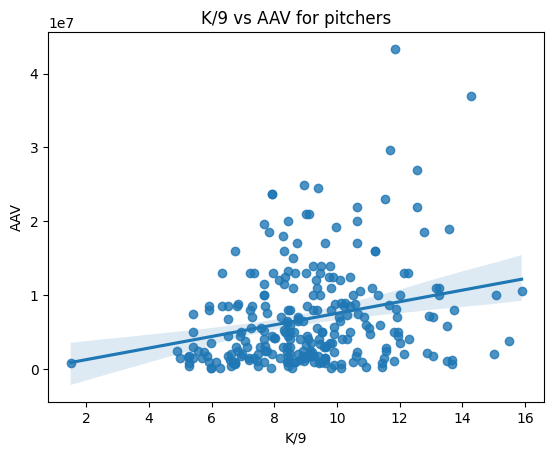

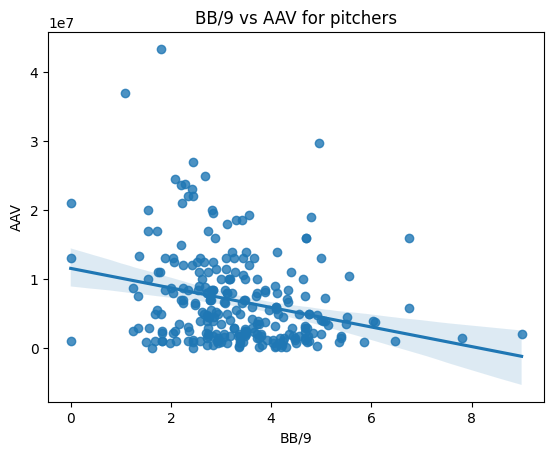

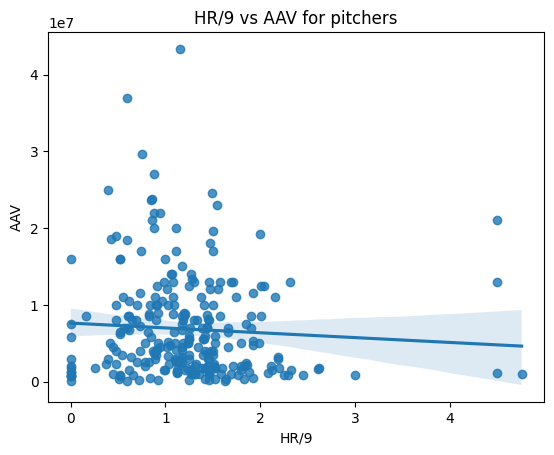

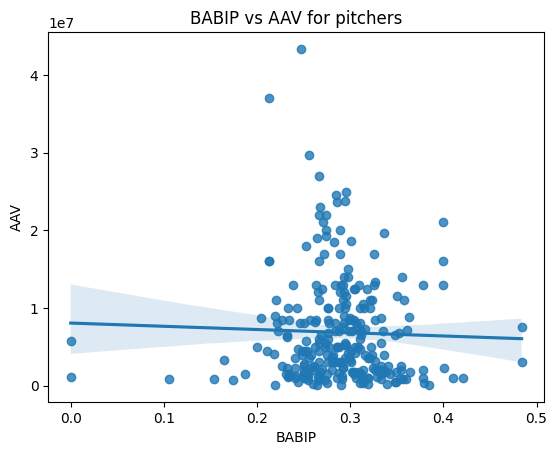

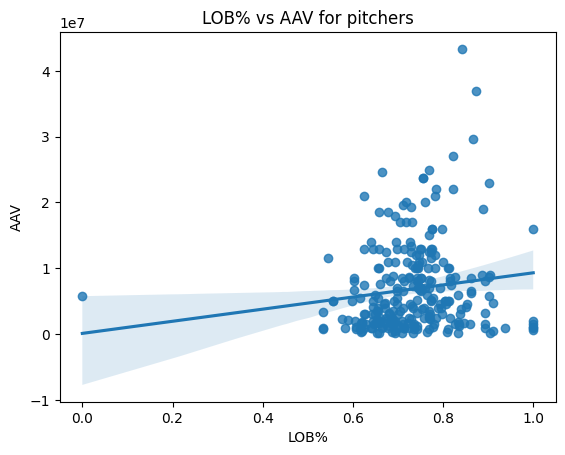

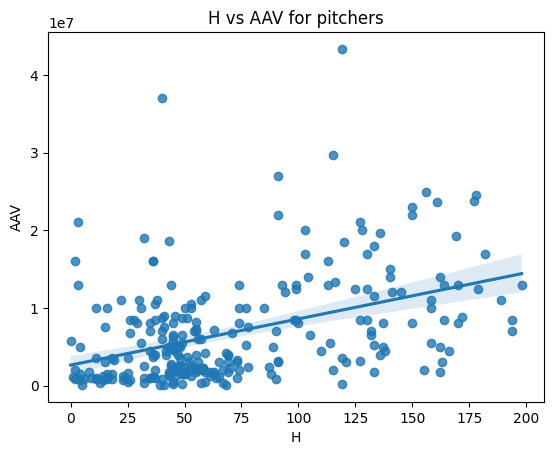

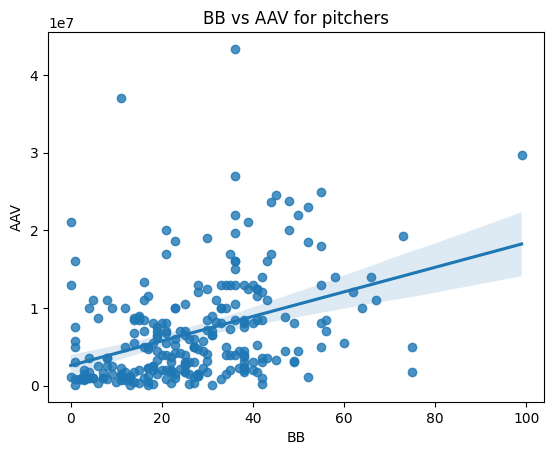

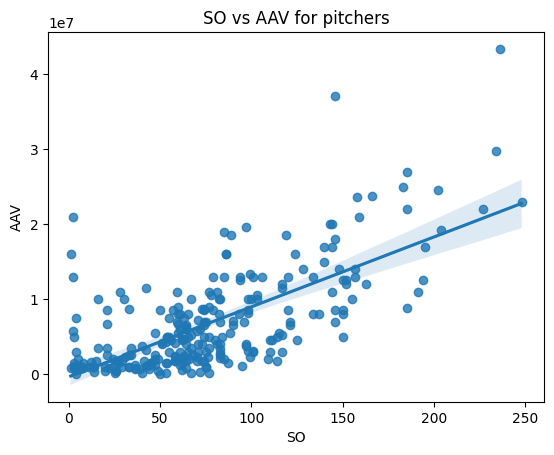

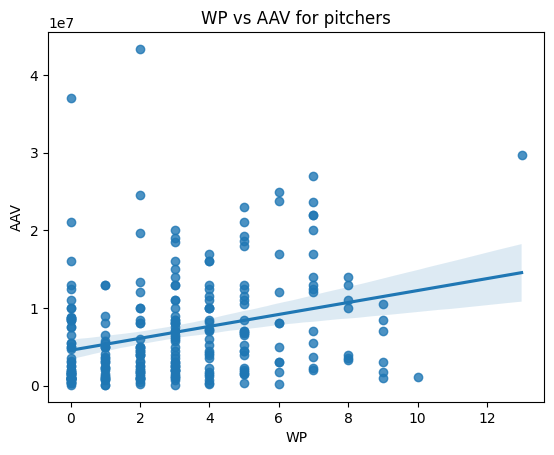

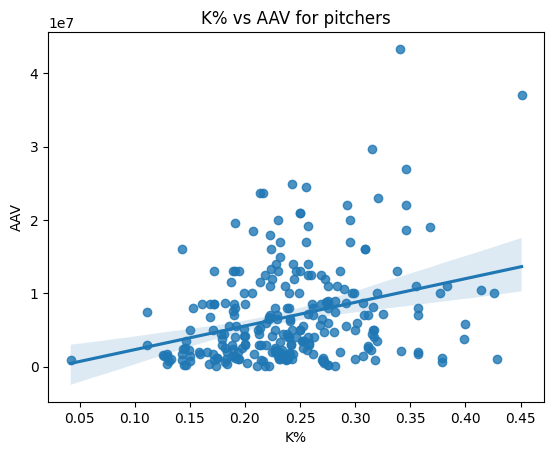

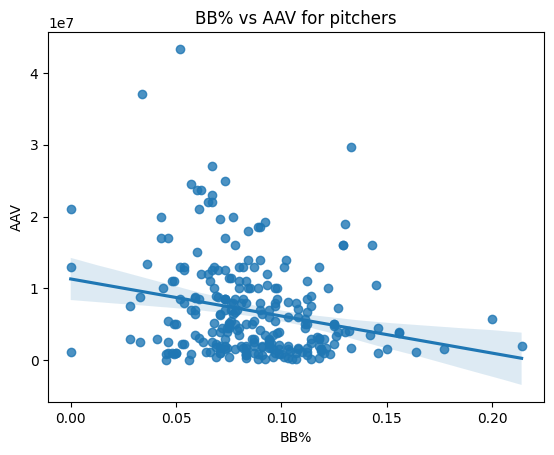

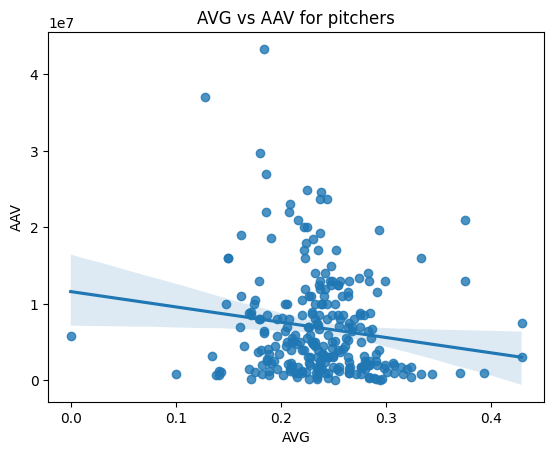

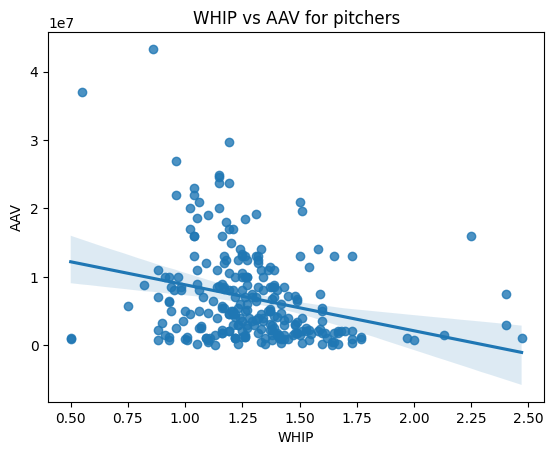

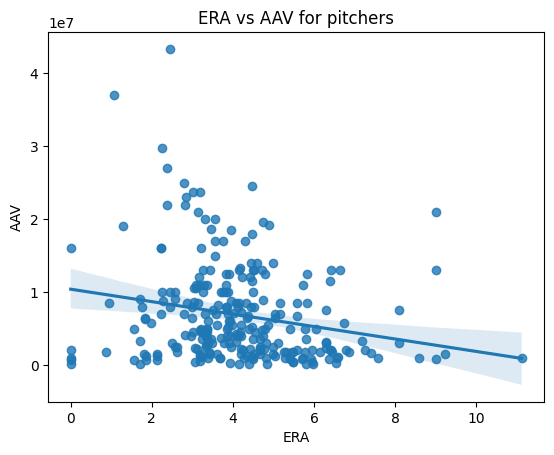

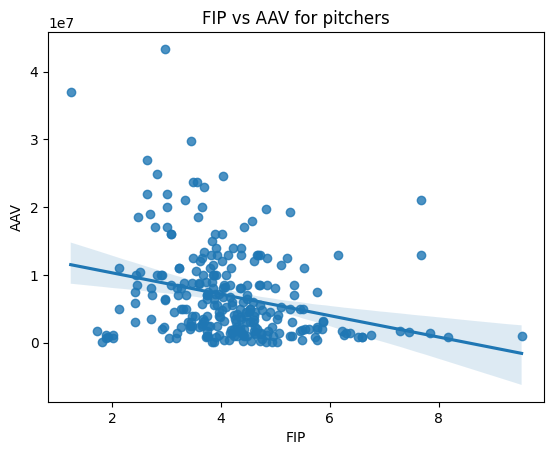

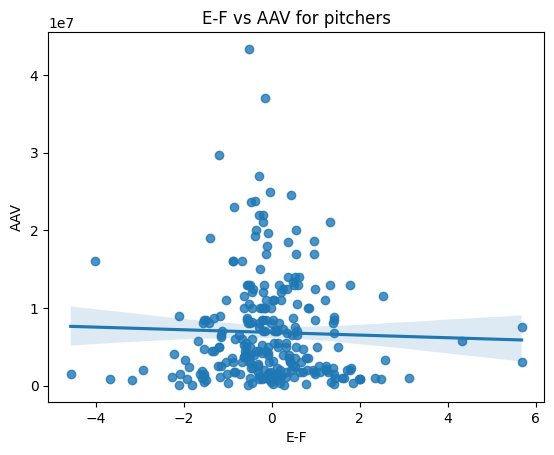

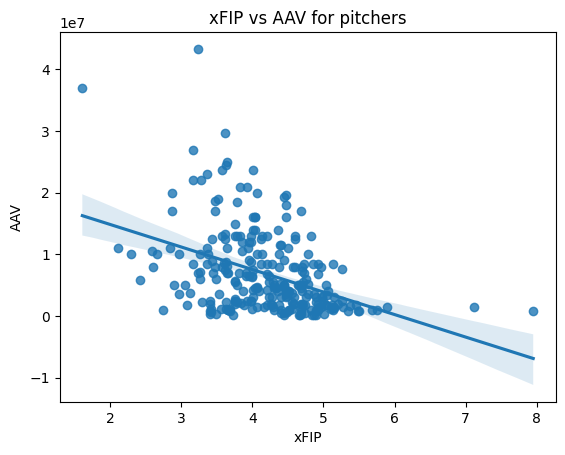

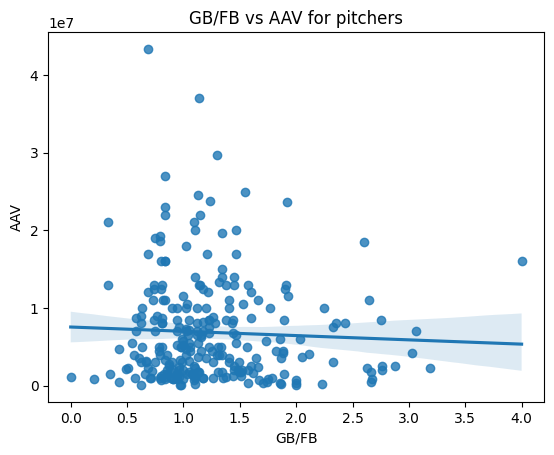

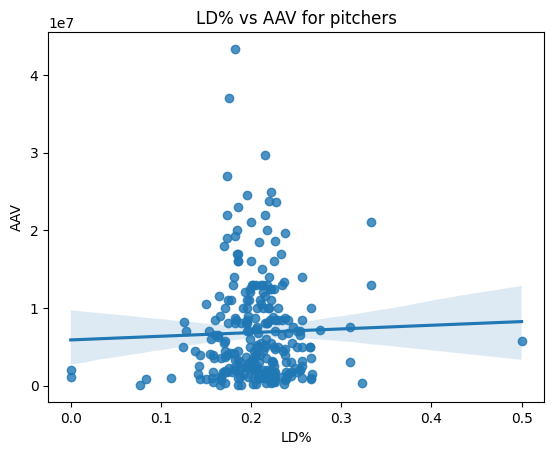

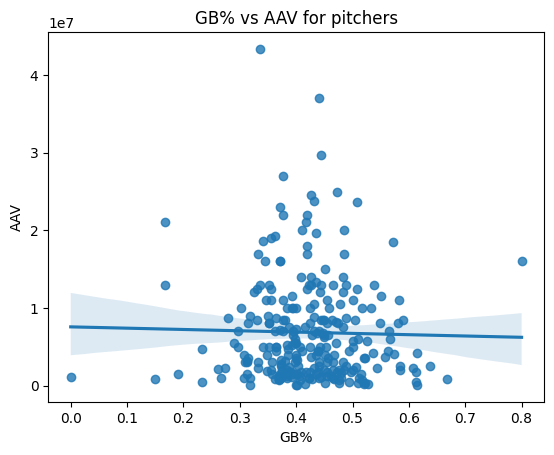

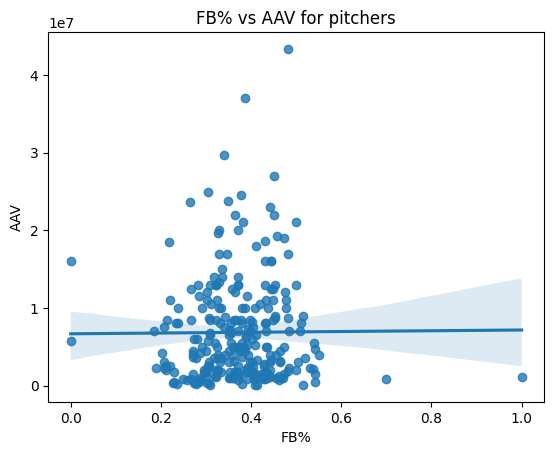

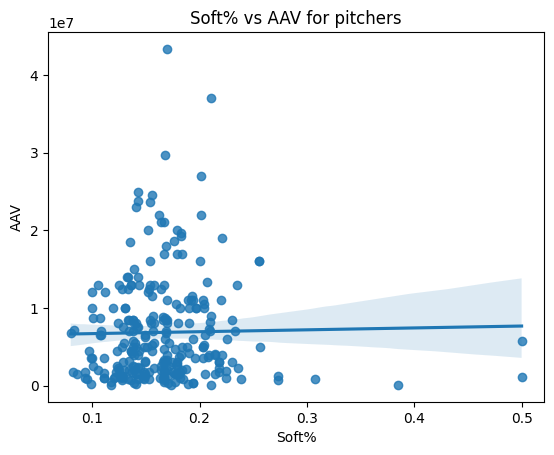

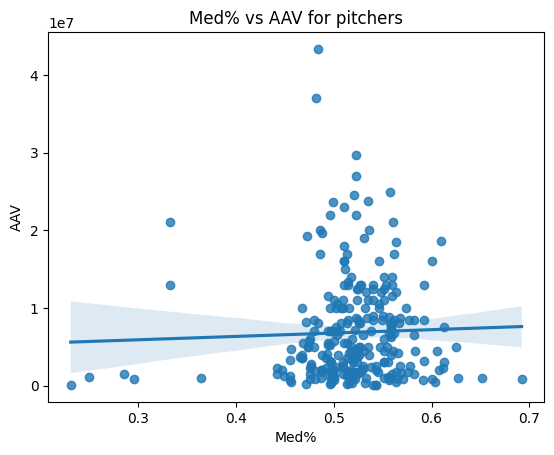

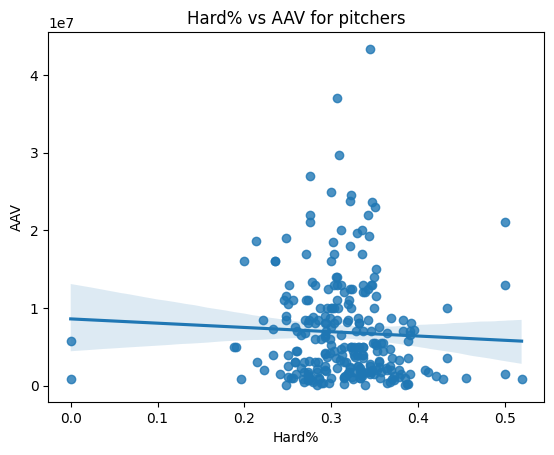

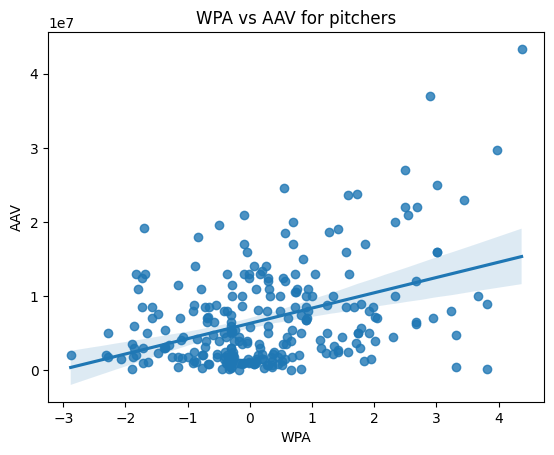

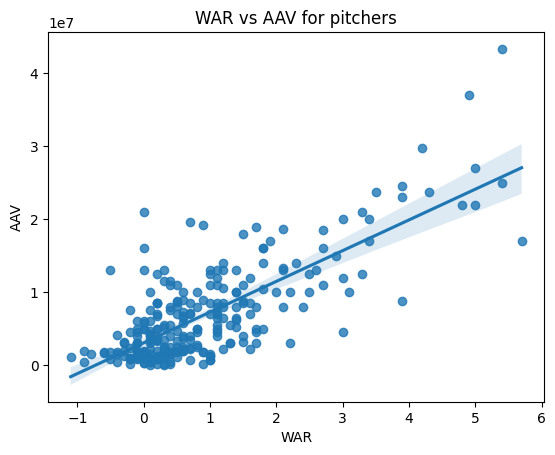

In [ ]:
for i in pitch_eda_df.columns:
  ax = sns.regplot(pitch_eda_df, x = i, y= 'AAV', fit_reg= True, )
  ax.set_title(f'{i} vs AAV for pitchers')
  plt.show()

In [ ]:
pitchers_22thru24['Pos'].value_counts(normalize = True)

Pos
RP    0.559028
SP    0.440972
Name: proportion, dtype: float64

In [ ]:
rp_sp = pitchers_22thru24.groupby('Pos')[['WAR', 'AAV', 'IP', 'WPA']].mean().reset_index()
rp_sp

Pos       WAR           AAV          IP       WPA
0  RP  0.455102  4.143417e+06   48.961224  0.390204
1  SP  1.472174  1.055527e+07  112.726957  0.084000

Text(0.5, 1.0, 'WAR by starter or reliever')

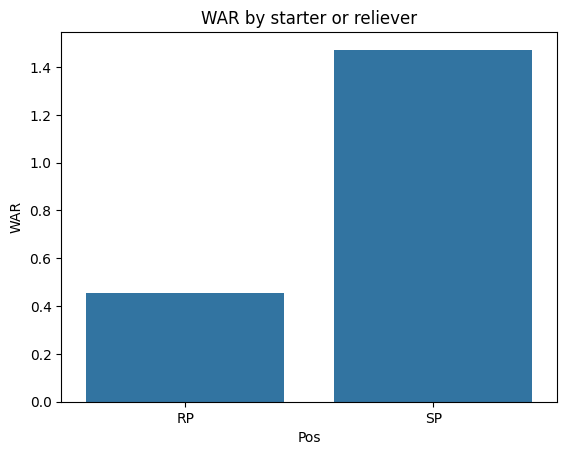

In [ ]:
sns.barplot(rp_sp, x = 'Pos', y = 'WAR').set_title('WAR by starter or reliever')

Text(0.5, 1.0, 'AAV by starter or reliever')

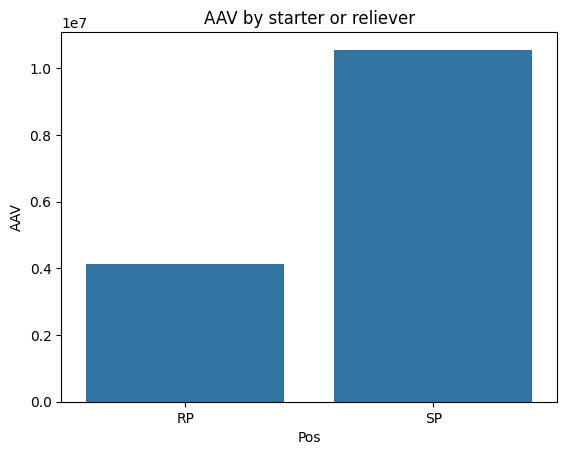

In [ ]:
sns.barplot(rp_sp, x = 'Pos', y = 'AAV').set_title('AAV by starter or reliever')

Text(0.5, 1.0, 'IP by starter or reliever')

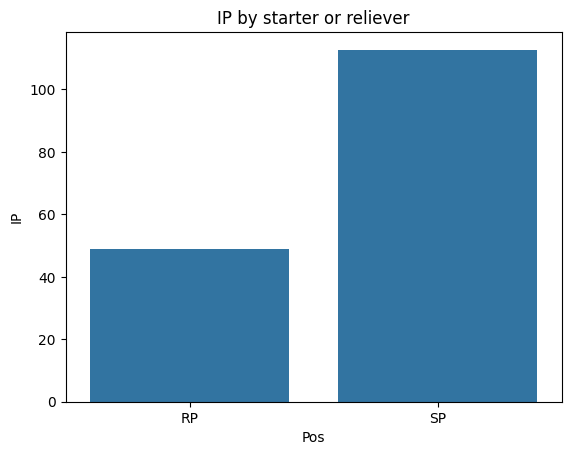

In [ ]:
sns.barplot(rp_sp, x = 'Pos', y = 'IP').set_title('IP by starter or reliever')

Text(0.5, 1.0, 'WPA by starter or reliever')

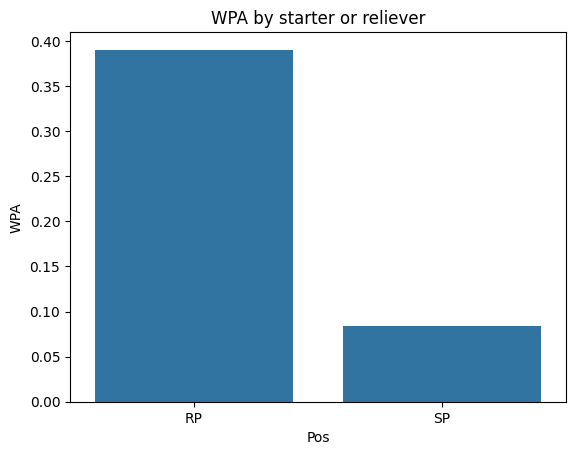

In [ ]:
sns.barplot(rp_sp, x = 'Pos', y = 'WPA').set_title('WPA by starter or reliever')

## Comparisons

In [ ]:
print(pos_eda_df['AAV'].mean())
print(pitch_eda_df['AAV'].mean())
print(pitch_eda_df['AAV'].mean()-pos_eda_df['AAV'].mean())

6750235.289530517
6970865.581010417
220630.29147990048


In [ ]:
print(pos_eda_df['WAR'].mean())
print(pitch_eda_df['WAR'].mean())

1.1262910798122068
0.9015267175572519


In [ ]:
print(pos_eda_df['WPA'].mean())
print(pitch_eda_df['WPA'].mean())

-0.02380281690140835
0.2558015267175573


Text(0.5, 1.0, 'Postion Player AAV histogram')

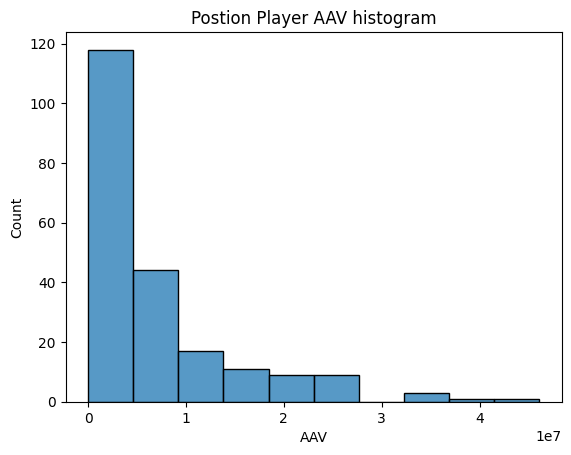

In [ ]:
sns.histplot(pos_eda_df, x = 'AAV', stat='count', bins=10).set_title('Postion Player AAV histogram')#Position Player AAV histogram

Text(0.5, 1.0, 'Pitcher AAV histogram')

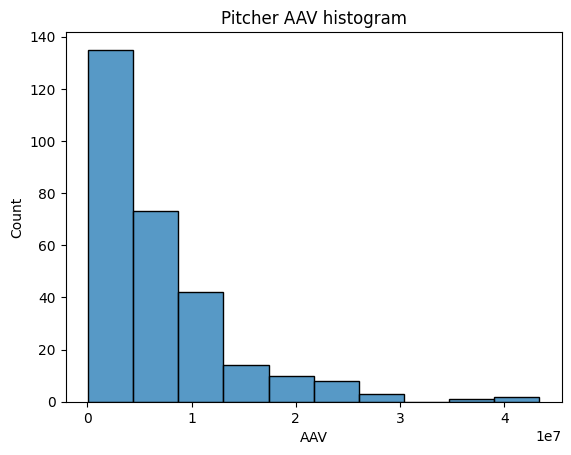

In [ ]:
sns.histplot(pitch_eda_df, x = 'AAV', stat='count', bins=10).set_title('Pitcher AAV histogram')#Pitcher AAV histogram

#Multi Linear regression Model

##For Position players

###All variables

In [ ]:
#Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
batter_x_cols = ['Service Time', 'G',	'AB',	'PA',	'H',	'1B',	'2B',	'3B',	'HR',	'R',	'RBI',	'BB',	'IBB',	'SB',	'AVG',	'BB%',	'K%',	'OBP',	'SLG',	'OPS',	'ISO',
                 'BABIP',	'wOBA',	'xwOBA',	'wRC+',	'LD%',	'GB%',	'FB%',	'Soft%',	'Med%',	'Hard%',	'WPA',	'WAR']
batter_target = ['AAV']

In [ ]:
pos_22thru24 = pos_22thru24.set_index('Name')

KeyError: "None of ['Name'] are in the columns"

In [ ]:
x = pos_22thru24[batter_x_cols] #Columns for data
y = pos_22thru24[batter_target]

In [ ]:
#x[['BABIP', 'BABIP.1']] #This column is duplicated

KeyError: "['BABIP.1'] not in index"

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(model.score(x_train, y_train)) #-- R2
print(model.score(x_vali, y_vali))

0.817457593626014
0.745700309721165


In [ ]:
train_prediction = model.predict(x_train)

train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
train_rmse

3335995.276496615

In [ ]:
pos_mlr_vali = []
vali_prediction = model.predict(x_vali)
vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
pos_mlr_vali.append(vali_rmse)
vali_rmse

4730578.500256767

In [ ]:
pos_mlr_vali


[4730578.500256767]

### Foward selection

In [ ]:
#Now I will use foward selection to see if it imroves
from mlxtend.feature_selection import SequentialFeatureSelector
forward = SequentialFeatureSelector(LinearRegression(), k_features='best', forward=True, scoring='r2', cv=5)
forward.fit(x_train, y_train)
forward_features = x_train.columns[list(forward.k_feature_idx_)]
#It takes 23 seconds with the amount of columns

In [ ]:
forward_features #These are the features selected with fowards selection

Index(['Service Time', 'G', '3B', 'HR', 'BB', 'BB%', 'OBP', 'ISO', 'xwOBA',
       'FB%', 'Hard%', 'WAR'],
      dtype='object')

In [ ]:
x = pos_22thru24[forward_features] #Foward features are now used for the x inputs
y = pos_22thru24[batter_target]

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train)) #-- R2
print(model.score(x_vali, y_vali))

train_prediction = model.predict(x_train) #-- Training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
print(f'Training RMSE: {train_rmse}')

vali_prediction = model.predict(x_vali)#V-- Validation RMSE
vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
pos_mlr_vali.append(vali_rmse)
print(f'Validation RMSE: {vali_rmse}')
#It does appear to have increased the R square along with decreasing the RME by about 500


0.787937045388585
0.7970289316815424
Training RMSE: 3595637.8660031785
Validation RMSE: 4226281.364709904


### Backward selection

In [ ]:
#Now I will use foward selection to see if it imroves
from mlxtend.feature_selection import SequentialFeatureSelector
backward = SequentialFeatureSelector(LinearRegression(), k_features='best', forward=False, scoring='r2', cv=5)
backward.fit(x_train, y_train)
backward_features = x_train.columns[list(backward.k_feature_idx_)]
#It takes 2 seconds with the amount of columns

In [ ]:
backward_features #These are the features selected with backwards selection
#The differences are that

Index(['Service Time', 'G', '3B', 'HR', 'BB', 'BB%', 'ISO', 'xwOBA', 'FB%',
       'WAR'],
      dtype='object')

In [ ]:
x = pos_22thru24[backward_features] #Foward features are now used for the x inputs
y = pos_22thru24[batter_target]

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train)) #-- R2
print(model.score(x_vali, y_vali))

train_prediction = model.predict(x_train) #-- Training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
print(f'Training RMSE: {train_rmse}')

vali_prediction = model.predict(x_vali)#V-- Validation RMSE
vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
pos_mlr_vali.append(vali_rmse)
print(f'Validation RMSE: {vali_rmse}')
#It does appear to have increased the R square along with decreasing the RME by about 500


0.7873804658192813
0.7969687784444174
Training RMSE: 3600353.3222579095
Validation RMSE: 4226907.57630317


In [ ]:
pos_mlr_vali

[4730578.500256767, 4226281.364709904, 4226907.57630317]

###Validation Plot

In [ ]:
pos_mlrs = ['All Variables', 'Fowards', 'Backwards']

In [ ]:
pos_rmse_dic = {'Validation RMSE':pos_mlr_vali,
                'Model Type': pos_mlrs}
pos_mlr_df = pd.DataFrame(pos_rmse_dic).sort_values(by = 'Validation RMSE', ascending = False)
pos_mlr_df

Validation RMSE     Model Type
0     4.730579e+06  All Variables
2     4.226908e+06      Backwards
1     4.226281e+06        Fowards

Text(0.5, 1.0, 'Position Linear Regression Models RMSE')

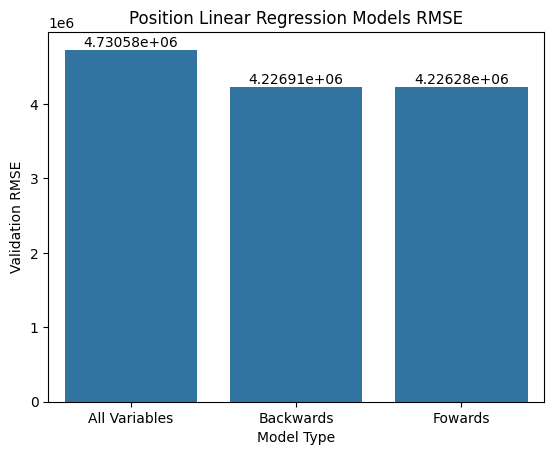

In [ ]:
ax = sns.barplot(pos_mlr_df, x = 'Model Type', y = 'Validation RMSE')#
ax.bar_label(ax.containers[0])
ax.set_title('Position Linear Regression Models RMSE') #Allows me to label wiht the value

## For Pitchers

### With all variables

In [ ]:
pitchers_22thru24 = pitchers_22thru24.reset_index()
pitchers_22thru24

index  Unnamed: 0                Name Pos Bats Thr Prev Team  Age  \
0        0           0        Max Scherzer  SP    R   R       LAD   37   
1        1           1        Carlos Rodón  SP    L   L       CHW   29   
2        2           2       Kevin Gausman  SP    L   R       SFG   31   
3        3           3   Eduardo Rodriguez  SP    L   L       BOS   29   
4        4           4          Robbie Ray  SP    L   L       TOR   30   
..     ...         ...                 ...  ..  ...  ..       ...  ...   
283    100         100         Erick Fedde  SP    R   R       KBO   31   
284    101         101  Yoshinobu Yamamoto  SP    R   R       JPN   25   
285    102         102         Yuki Matsui  RP    L   L       JPN   28   
286    103         103       Shota Imanaga  SP    L   L       JPN   30   
287    104         104       Justin Wilson  RP    L   L       MIL   36   

     Service Time          QO Signing Team  Years  Total Salary          AAV  \
0          13.079         NaN          NYM    3.0   130000000.0  43333333.33   
1           6.168         NaN          SFG    1.0    21500000.0  22000000.00   
2           7.151         NaN          TOR    5.0   110000000.0  22000000.00   
3           6.130  18400000.0          DET    2.0    22846154.0   8846154.00   
4           7.007  18400000.0          SEA    5.0   115000000.0  23000000.00   
..            ...         ...          ...    ...           ...          ...   
283         4.099         NaN          CHW    2.0    15000000.0   7500000.00   
284         0.000         NaN          LAD   12.0   325000000.0  27083333.33   
285         0.000         NaN          SDP    5.0    28000000.0   5600000.00   
286         0.000         NaN          CHC    4.0    53250000.0  13500000.00   
287        11.035         NaN          CIN    1.0     1500000.0   1500000.00   

     playerid  Season     W    L   SV     G    GS     IP    K/9  BB/9  HR/9  \
0        3137  2021.0  15.0  4.0  0.0  30.0  30.0  179.1  11.84  1.81  1.15   
1       16137  2021.0  13.0  5.0  0.0  24.0  24.0  132.2  12.55  2.44  0.88   
2       14107  2021.0  14.0  6.0  0.0  33.0  33.0  192.0  10.64  2.34  0.94   
3       13164  2021.0  13.0  8.0  0.0  32.0  31.0  157.2  10.56  2.68  1.08   
4       11486  2021.0  13.0  7.0  0.0  32.0  32.0  193.1  11.54  2.42  1.54   
..        ...     ...   ...  ...  ...   ...   ...    ...    ...   ...   ...   
283     17425  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN   
284     33825  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN   
285     33826  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN   
286     33829  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN   
287      4301  2023.0   NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   NaN   

     BABIP   LOB%      H    BB     SO   WP     K%    BB%    AVG  WHIP   ERA  \
0    0.247  0.843  119.0  36.0  236.0  2.0  0.341  0.052  0.184  0.86  2.46   
1    0.267  0.822   91.0  36.0  185.0  7.0  0.346  0.067  0.186  0.96  2.37   
2    0.274  0.784  150.0  50.0  227.0  7.0  0.293  0.065  0.208  1.04  2.81   
3    0.363  0.689  172.0  47.0  185.0  0.0  0.274  0.070  0.275  1.39  4.74   
4    0.268  0.901  150.0  52.0  248.0  5.0  0.321  0.067  0.209  1.04  2.84   
..     ...    ...    ...   ...    ...  ...    ...    ...    ...   ...   ...   
283    NaN    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   
284    NaN    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   
285    NaN    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   
286    NaN    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   
287    NaN    NaN    NaN   NaN    NaN  NaN    NaN    NaN    NaN   NaN   NaN   

      FIP   E-F  xFIP  GB/FB    LD%    GB%    FB%  Soft%   Med%  Hard%   WPA  \
0    2.97 -0.52  3.24   0.69  0.182  0.335  0.483  0.170  0.484  0.345  4.37   
1    2.65 -0.28  3.17   0.84  0.173  0.377  0.450  0.201  0.523  0.276  2.50   
2    3.00 -0.19  

In [ ]:
statless_pitch = pitchers_22thru24.loc[pitchers_22thru24['G'].isna()]
statless_pitch.shape

(26, 48)

In [ ]:
pitchers_22thru24.shape

(288, 48)

In [ ]:
pitchers_22thru24 = pitchers_22thru24.drop(statless_pitch.index)

In [ ]:
pitchers_22thru24.shape#Indexing was messed up so make sure you reset index like  you did up top

(262, 48)

In [ ]:
starters = pitchers_22thru24.loc[pitchers_22thru24['Pos'] == 'SP']
starters.shape #This df has starters in it but no relievers

(115, 48)

In [ ]:
pitcher_x_cols = ['W',	'L',	'SV',	'G','GS',	'IP',	'K/9',	'BB/9',	'HR/9',	'BABIP',	'LOB%',	'H',	'BB',	'SO',	'WP',	'K%',	'BB%','AVG',	'WHIP',	'ERA',	'FIP',	'E-F',	'xFIP',	'GB/FB',
                   'LD%',	'GB%',	'FB%',	'Soft%',	'Med%',	'Hard%',	'WPA',	'WAR']
pitcher_target = ['AAV']

In [ ]:
x = pitchers_22thru24[pitcher_x_cols] #Columns for data
y = pitchers_22thru24[pitcher_target]

In [ ]:
x.shape

(262, 32)

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(model.score(x_train, y_train)) #-- R2
print(model.score(x_vali, y_vali))

0.7316039168499239
0.3647206478056022


In [ ]:
train_prediction = model.predict(x_train)

train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
train_rmse

3643189.084075307

In [ ]:
pitch_mlr_vali = []
vali_prediction = model.predict(x_vali)

vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
pitch_mlr_vali.append(vali_rmse)
vali_rmse

3992542.1915618144

###Foward selection

In [ ]:
#Now I will use foward selection to see if it imroves
from mlxtend.feature_selection import SequentialFeatureSelector
forward = SequentialFeatureSelector(LinearRegression(), k_features='best', forward=True, scoring='r2', cv=5)
forward.fit(x_train, y_train)
forward_features = x_train.columns[list(forward.k_feature_idx_)]
#It takes 12 seconds with the amount of columns

In [ ]:
forward_features #These are the features selected with fowards selection

Index(['SV', 'G', 'IP', 'H', 'SO', 'AVG', 'xFIP', 'WAR'], dtype='object')

In [ ]:
x = pitchers_22thru24[forward_features] #Foward features are now used for the x inputs
y = pitchers_22thru24[pitcher_target]

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train)) #-- R2
print(model.score(x_vali, y_vali))

train_prediction = model.predict(x_train) #-- Training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
print(f'Training RMSE: {train_rmse}')

vali_prediction = model.predict(x_vali)#V-- Validation RMSE
vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
pitch_mlr_vali.append(vali_rmse)
print(f'Validation RMSE: {vali_rmse}')
#It does appear to have increased the R square along with decreasing the RME by about 500


0.6879811268182571
0.4847056380288628
Training RMSE: 3928113.765277433
Validation RMSE: 3595794.299297468


###Backward selection

In [ ]:
#Now I will use foward selection to see if it imroves
from mlxtend.feature_selection import SequentialFeatureSelector
backward = SequentialFeatureSelector(LinearRegression(), k_features='best', forward=False, scoring='r2', cv=5)
backward.fit(x_train, y_train)
backward_features = x_train.columns[list(backward.k_feature_idx_)]
#It takes 12 seconds with the amount of columns

In [ ]:
backward_features #These features are the same

Index(['SV', 'G', 'IP', 'H', 'SO', 'AVG', 'xFIP', 'WAR'], dtype='object')

In [ ]:
x = pitchers_22thru24[backward_features] #Foward features are now used for the x inputs
y = pitchers_22thru24[pitcher_target]

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train)) #-- R2
print(model.score(x_vali, y_vali))

train_prediction = model.predict(x_train) #-- Training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
print(f'Training RMSE: {train_rmse}')

vali_prediction = model.predict(x_vali)#V-- Validation RMSE
vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
pitch_mlr_vali.append(vali_rmse)
print(f'Validation RMSE: {vali_rmse}')
#It does appear to have increased the R square along with decreasing the RME by about 500


0.6879811268182571
0.4847056380288628
Training RMSE: 3928113.765277433
Validation RMSE: 3595794.299297468


###Validation Plot

In [ ]:
pitch_mlrs = ['All Variables', 'Fowards', 'Backwards']

In [ ]:
pitch_rmse_dic = {'Validation RMSE':pitch_mlr_vali,
                'Model Type': pitch_mlrs}
pitch_mlr_df = pd.DataFrame(pitch_rmse_dic).sort_values(by = 'Validation RMSE', ascending = False)
pitch_mlr_df

Validation RMSE     Model Type
0     3.992542e+06  All Variables
1     3.595794e+06        Fowards
2     3.595794e+06      Backwards

Text(0.5, 1.0, 'Pitcher Linear Regression Models RMSE')

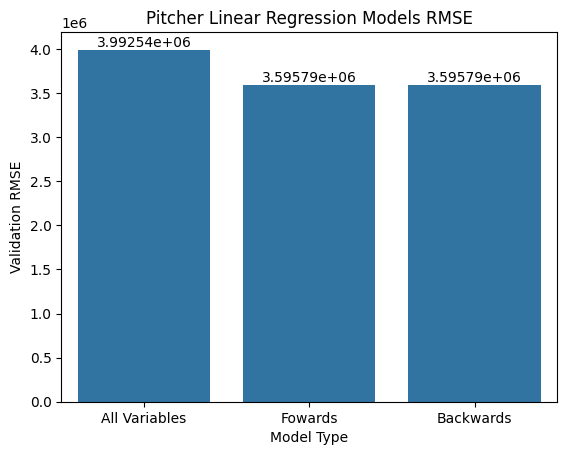

In [ ]:
ax = sns.barplot(pitch_mlr_df, x = 'Model Type', y = 'Validation RMSE')#
ax.bar_label(ax.containers[0])
ax.set_title('Pitcher Linear Regression Models RMSE') #Allows me to label wiht the value

#Decision tree

## For Batters

In [ ]:
x = pos_22thru24[batter_x_cols] #Columns for data
y = pos_22thru24[batter_target]

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(max_depth=4,random_state= 0)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_vali, y_vali))

0.9214653373235439
0.7793964196886481


In [ ]:
model.get_n_leaves()

16

In [ ]:
model.get_depth()#Depth of 18

4

In [ ]:
train_prediction = model.predict(x_train)

train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
train_rmse

2188135.603748489

In [ ]:
vali_prediction = model.predict(x_vali)

vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
vali_rmse

4406031.688845816

Importance

In [ ]:
importance = pd.DataFrame(model.feature_importances_).rename(columns = {0: 'importance'})
importance.head()

importance
0    0.000000
1    0.004359
2    0.009792
3    0.000000
4    0.035814

In [ ]:
features_for_importance = pd.DataFrame(model.feature_names_in_).rename(columns = {0: 'Col'})
features_for_importance.head()

Col
0  Service Time
1             G
2            AB
3            PA
4             H

In [ ]:
importance_df = features_for_importance.merge(importance, how = 'left', on = features_for_importance.index)
importance_df = importance_df.sort_values(by = 'importance', ascending=False)
importance_df.head(12)

key_0    Col  importance
32     32    WAR    0.751930
23     23  xwOBA    0.080694
11     11     BB    0.042706
4       4      H    0.035814
15     15    BB%    0.027651
30     30  Hard%    0.015890
9       9      R    0.013104
27     27    FB%    0.010053
2       2     AB    0.009792
8       8     HR    0.008006
1       1      G    0.004359
28     28  Soft%    0.000000

Text(0.5, 1.0, 'Variable Importance')

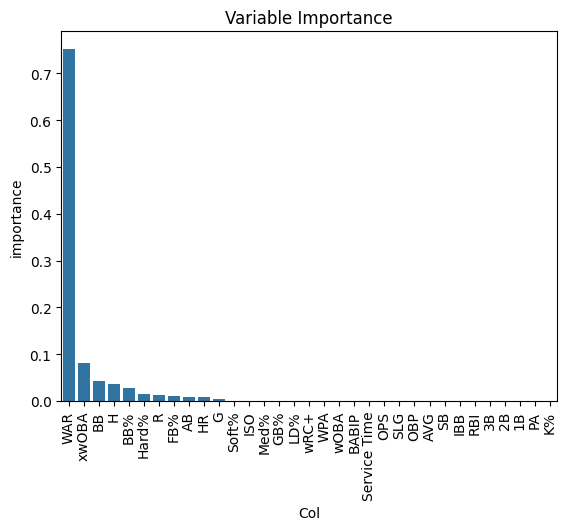

In [ ]:
ax = sns.barplot(importance_df, x = 'Col', y = 'importance')
plt.xticks(rotation=90)
ax.set_title('Variable Importance')

[Text(0.5, 0.9, 'WAR <= 2.15\nsquared_error = 60965913104088.9\nsamples = 170\nvalue = 6540591.824'),
 Text(0.25, 0.7, 'xwOBA <= 0.325\nsquared_error = 15454943512736.504\nsamples = 138\nvalue = 3702249.652'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'WAR <= 0.75\nsquared_error = 5427827580566.535\nsamples = 112\nvalue = 2563663.5'),
 Text(0.0625, 0.3, 'HR <= 13.5\nsquared_error = 3565696349098.906\nsamples = 82\nvalue = 1977445.451'),
 Text(0.03125, 0.1, 'squared_error = 1713368995787.328\nsamples = 70\nvalue = 1577634.414'),
 Text(0.09375, 0.1, 'squared_error = 7999185864538.582\nsamples = 12\nvalue = 4309676.5'),
 Text(0.1875, 0.3, 'G <= 86.5\nsquared_error = 7010879278827.203\nsamples = 30\nvalue = 4165992.833'),
 Text(0.15625, 0.1, 'squared_error = 2860000000000.0\nsamples = 5\nvalue = 6800000.0'),
 Text(0.21875, 0.1, 'squared_error = 6175936633620.322\nsamples = 25\nvalue = 3639191.4'),
 Text(0.375, 0.5, 'H <= 125.0\nsquared_error = 29008400085851.17\nsamples = 26\nvalue = 

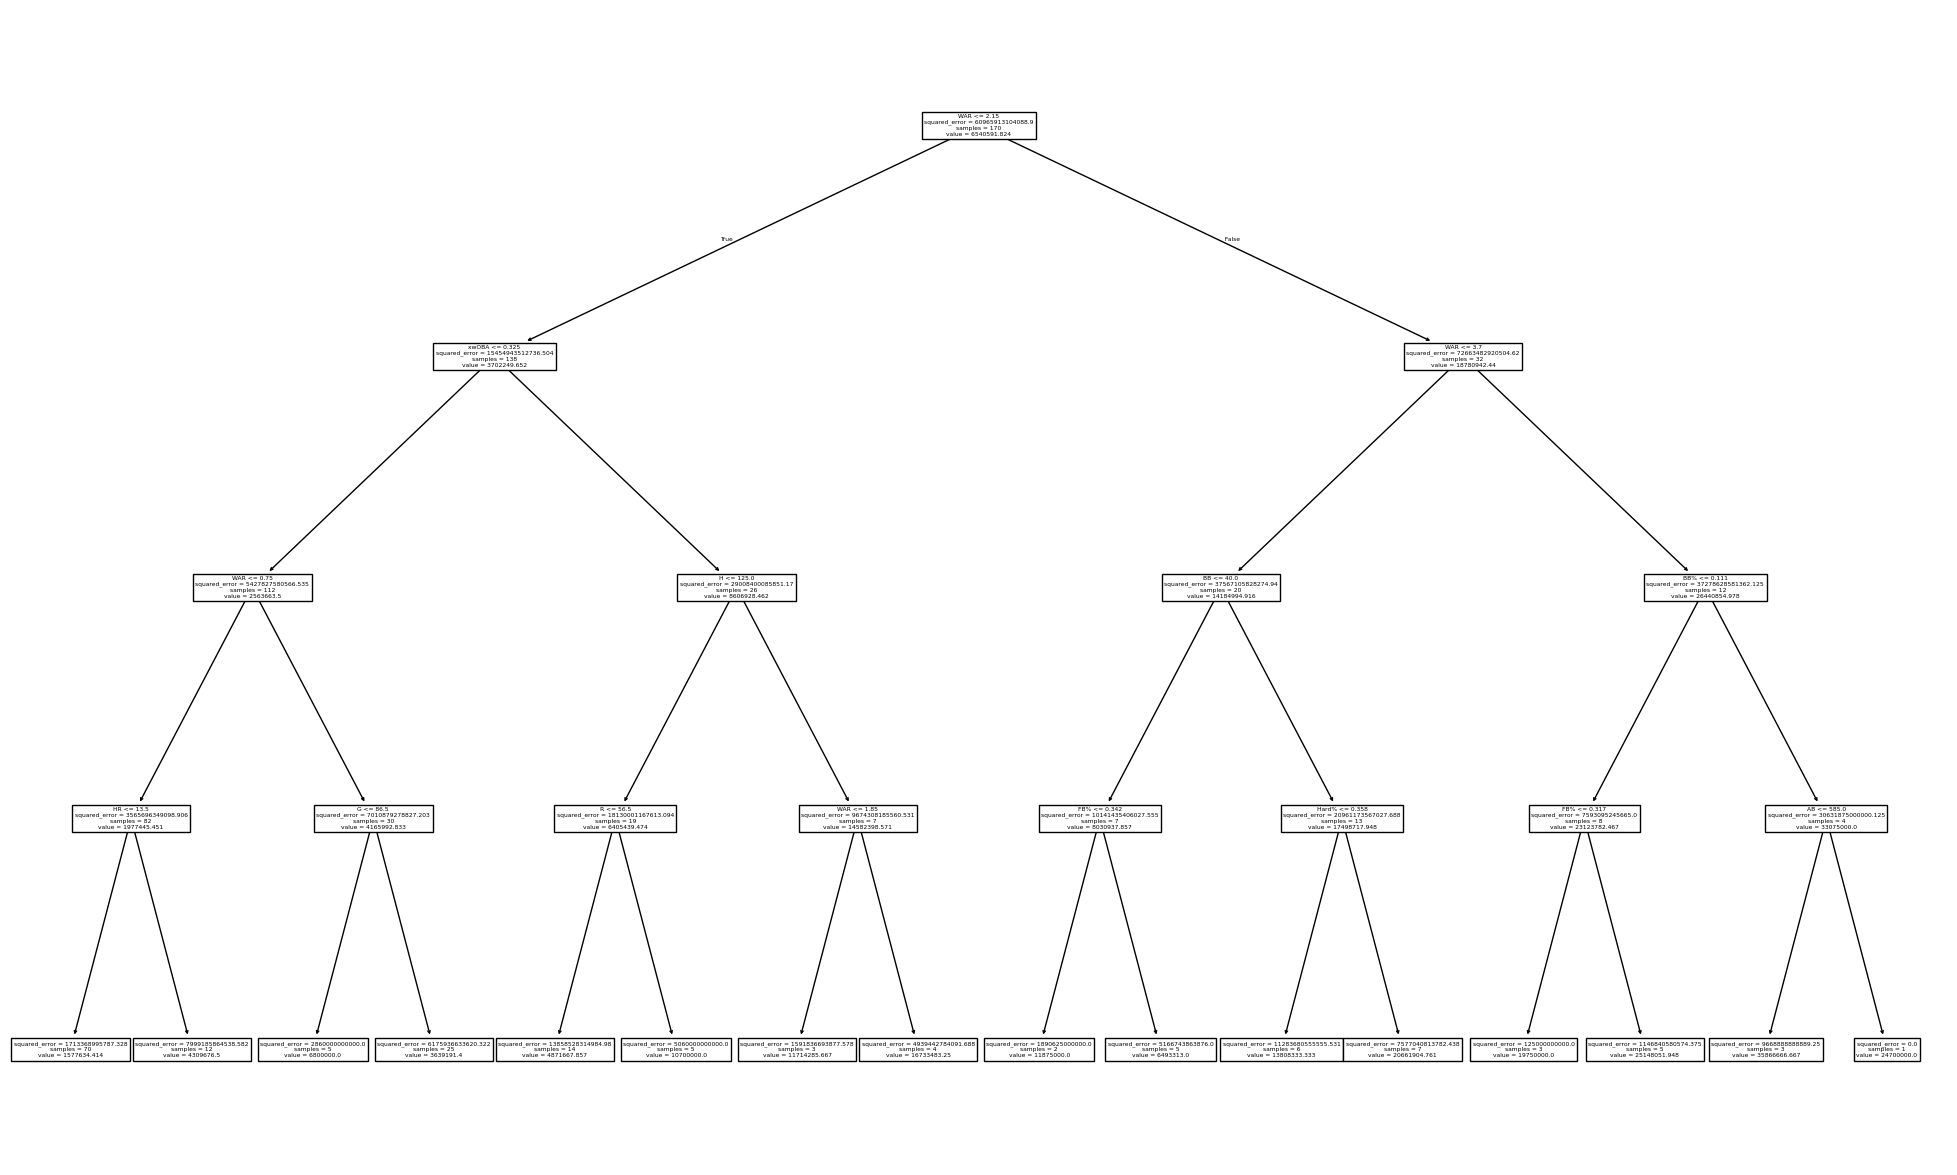

In [ ]:
from sklearn import tree
plt.figure(figsize= (25, 15))
tree.plot_tree(model, feature_names=x.columns)


In [ ]:
valid_rmse = []
depth_count = []

for i in range(1,25):

  x_train, x_vali, y_train, y_vali = train_test_split( #Split data
  x, y, test_size=0.2, random_state=42)

  model = DecisionTreeRegressor(max_depth=i,random_state= 0)
  model.fit(x_train, y_train)

    #print(model.score(x_train, y_train))
    #print(model.score(x_vali, y_vali))

  vali_prediction = model.predict(x_vali)
  vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
  valid_rmse.append(vali_rmse)

  depth_count.append(model.get_depth())


tree_dic = {'vali_rmse' : valid_rmse,
         'depth': depth_count}
tree_dic


{'vali_rmse': [7514233.848372057,
  5938494.698726997,
  4804953.571956095,
  4406031.688845816,
  4863533.73501514,
  5429179.595736948,
  5019235.624332579,
  4959218.500780261,
  5462785.318879749,
  4800454.242729515,
  5029625.487257448,
  5783641.743918917,
  5258127.871559338,
  5517821.3097461015,
  5252364.663558888,
  5095770.503026165,
  4926810.438091079,
  5252366.152815562,
  5362549.865380933,
  5362549.865380933,
  5362549.865380933,
  5362549.865380933,
  5362549.865380933,
  5362549.865380933],
 'depth': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  18,
  18,
  18,
  18,
  18,
  18]}

In [ ]:
tree_data = pd.DataFrame(tree_dic)
tree_data

vali_rmse  depth
0   7.514234e+06      1
1   5.938495e+06      2
2   4.804954e+06      3
3   4.406032e+06      4
4   4.863534e+06      5
5   5.429180e+06      6
6   5.019236e+06      7
7   4.959219e+06      8
8   5.462785e+06      9
9   4.800454e+06     10
10  5.029625e+06     11
11  5.783642e+06     12
12  5.258128e+06     13
13  5.517821e+06     14
14  5.252365e+06     15
15  5.095771e+06     16
16  4.926810e+06     17
17  5.252366e+06     18
18  5.362550e+06     18
19  5.362550e+06     18
20  5.362550e+06     18
21  5.362550e+06     18
22  5.362550e+06     18
23  5.362550e+06     18

<Axes: xlabel='depth', ylabel='vali_rmse'>

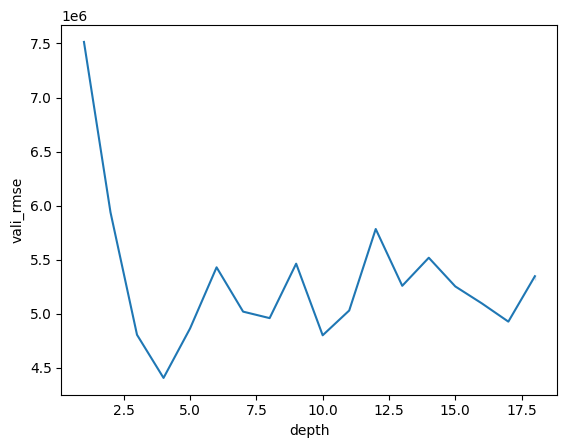

In [ ]:
sns.lineplot(tree_data, x = 'depth', y ='vali_rmse')

## For Pitchers

In [ ]:
x = pitchers_22thru24[pitcher_x_cols] #Columns for data
y = pitchers_22thru24[pitcher_target]

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(max_depth=2,random_state= 0)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_vali, y_vali))

0.616103272689391
0.4057666708436134


In [ ]:
model.get_n_leaves()

4

In [ ]:
model.get_depth()#Depth of 18

2

In [ ]:
train_prediction = model.predict(x_train)

train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
train_rmse

4357133.133096218

In [ ]:
vali_prediction = model.predict(x_vali)

vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
vali_rmse

3861407.6047718776

[Text(0.5, 0.8333333333333334, 'WAR <= 1.75\nsquared_error = 49452385990684.68\nsamples = 209\nvalue = 7129255.316'),
 Text(0.25, 0.5, 'SO <= 77.5\nsquared_error = 19475054659278.64\nsamples = 174\nvalue = 5019180.517'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 13077667132693.71\nsamples = 123\nvalue = 3844400.52'),
 Text(0.375, 0.16666666666666666, 'squared_error = 23548003393412.21\nsamples = 51\nvalue = 7852473.451'),
 Text(0.75, 0.5, 'WAR <= 4.05\nsquared_error = 66305773812334.875\nsamples = 35\nvalue = 17619341.457'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 23884659355413.72\nsamples = 26\nvalue = 14228698.218'),
 Text(0.875, 0.16666666666666666, 'squared_error = 59697881837177.125\nsamples = 9\nvalue = 27414533.037')]

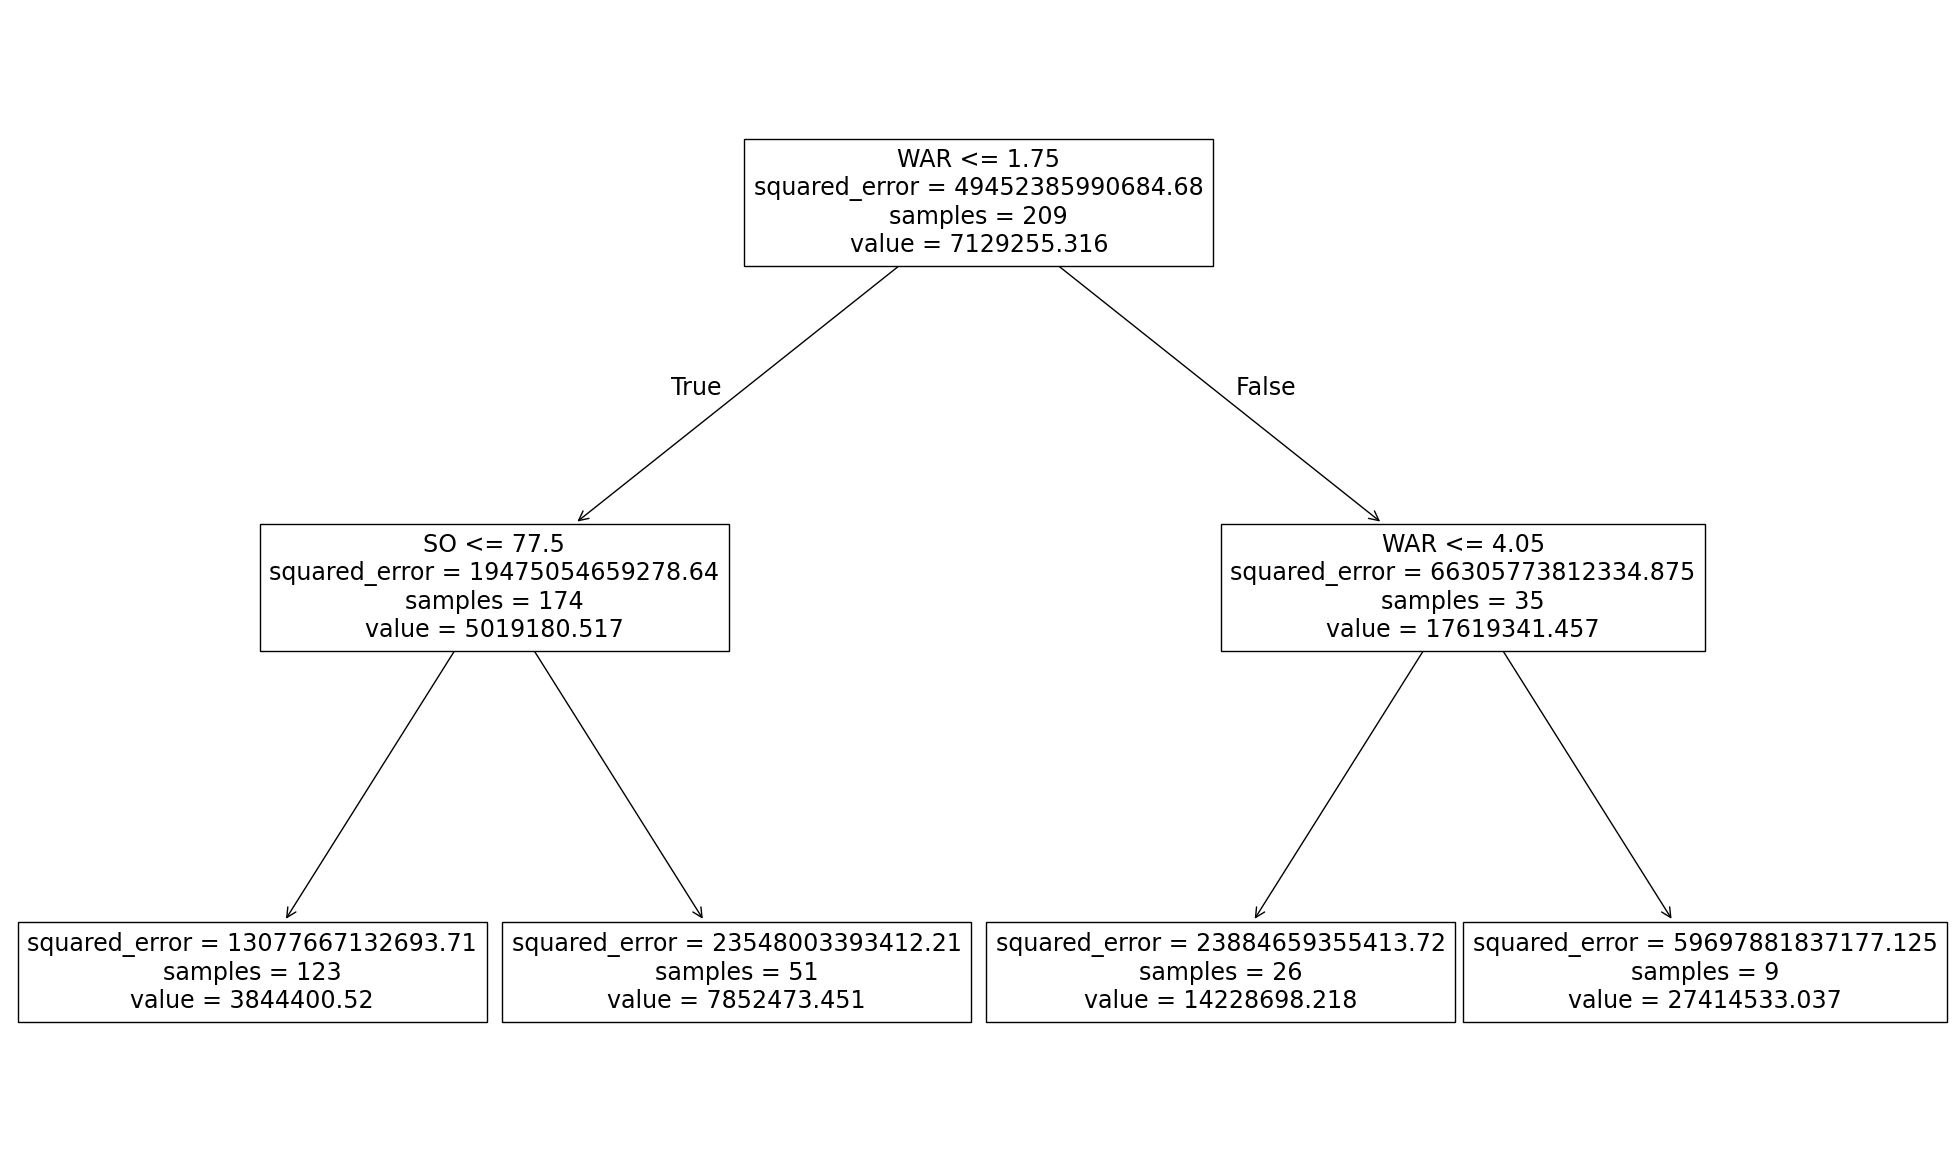

In [ ]:
from sklearn import tree
plt.figure(figsize= (25, 15))
tree.plot_tree(model, feature_names=x.columns)

In [ ]:
valid_rmse = []
depth_count = []

for i in range(1,19):

  x_train, x_vali, y_train, y_vali = train_test_split( #Split data
  x, y, test_size=0.2, random_state=42)

  model = DecisionTreeRegressor(max_depth=i,random_state= 0)
  model.fit(x_train, y_train)

    #print(model.score(x_train, y_train))
    #print(model.score(x_vali, y_vali))

  vali_prediction = model.predict(x_vali)
  vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
  valid_rmse.append(vali_rmse)

  depth_count.append(model.get_depth())


tree_dic = {'vali_rmse' : valid_rmse,
         'depth': depth_count}
tree_dic


{'vali_rmse': [4624044.358865391,
  3861407.6047718776,
  4420578.959405729,
  4722766.020435927,
  5148891.767371919,
  4962222.737344934,
  4999697.763234537,
  4671629.99094881,
  5193462.6927894205,
  4655712.770502764,
  4740276.835110517,
  4948735.488014401,
  4729144.881101117,
  4945845.707131339,
  4983225.315196201,
  4983225.315196201,
  4983225.315196201,
  4983225.315196201],
 'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 15, 15]}

In [ ]:
tree_data = pd.DataFrame(tree_dic)
tree_data

vali_rmse  depth
0   4.624044e+06      1
1   3.861408e+06      2
2   4.420579e+06      3
3   4.722766e+06      4
4   5.148892e+06      5
5   4.962223e+06      6
6   4.999698e+06      7
7   4.671630e+06      8
8   5.193463e+06      9
9   4.655713e+06     10
10  4.740277e+06     11
11  4.948735e+06     12
12  4.729145e+06     13
13  4.945846e+06     14
14  4.983225e+06     15
15  4.983225e+06     15
16  4.983225e+06     15
17  4.983225e+06     15

<Axes: xlabel='depth', ylabel='vali_rmse'>

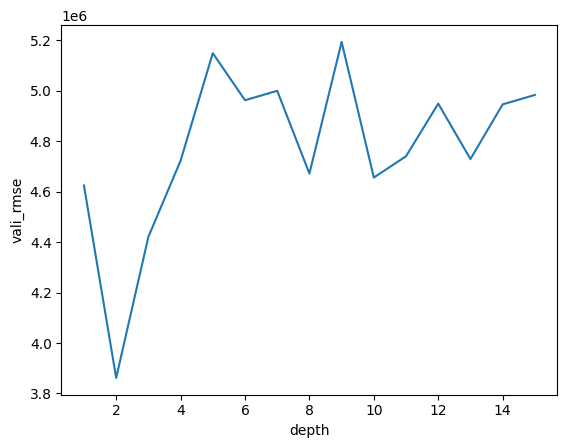

In [ ]:
sns.lineplot(tree_data, x = 'depth', y ='vali_rmse')

In [ ]:
importance = pd.DataFrame(model.feature_importances_).rename(columns = {0: 'importance'})
importance.head()

importance
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0

In [ ]:
features_for_importance = pd.DataFrame(model.feature_names_in_).rename(columns = {0: 'Col'})
features_for_importance.head()

Col
0   W
1   L
2  SV
3   G
4  GS

In [ ]:
importance_df = features_for_importance.merge(importance, how = 'left', on = features_for_importance.index)
importance_df = importance_df.sort_values(by = 'importance', ascending=False)
importance_df.head(12)

key_0    Col  importance
31     31    WAR    0.909048
13     13     SO    0.090952
17     17    AVG    0.000000
30     30    WPA    0.000000
29     29  Hard%    0.000000
28     28   Med%    0.000000
27     27  Soft%    0.000000
26     26    FB%    0.000000
25     25    GB%    0.000000
24     24    LD%    0.000000
23     23  GB/FB    0.000000
22     22   xFIP    0.000000

Text(0.5, 1.0, 'Variable Importance')

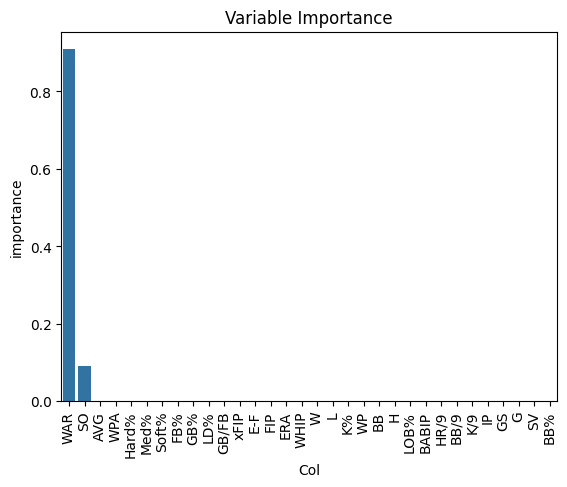

In [ ]:
ax = sns.barplot(importance_df, x = 'Col', y = 'importance')
plt.xticks(rotation=90)
ax.set_title('Variable Importance')

# KNN

##For Position Players

In [ ]:
from sklearn.neighbors import KNeighborsRegressor#Import

In [ ]:
x = pos_22thru24[batter_x_cols] #Columns for data
y = pos_22thru24[batter_target]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
neigh = KNeighborsRegressor(n_neighbors= 5, weights= 'uniform')
neigh.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
neigh.score(x_train, y_train)

0.8023494865254712

In [ ]:
neigh.score(x_vali, y_vali)

0.6646485920786489

In [ ]:
train_prediction = neigh.predict(x_train)

train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
train_rmse

3471302.9296600847

In [ ]:
vali_prediction = neigh.predict(x_vali)

vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
vali_rmse

5432395.803344237

In [ ]:
np.sqrt(213)# Lets go from 1-20 neighbors

14.594519519326424

In [ ]:
valid_rmse = []
k_neighbors = []

for i in range(1,21):
  x = pos_22thru24[batter_x_cols]
  x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns) #Columns for data
  y = pos_22thru24[batter_target]

  x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x_scaled, y, test_size=0.2, random_state=42)

  neigh = KNeighborsRegressor(n_neighbors= i)
  neigh.fit(x_train, y_train)

  vali_prediction = neigh.predict(x_vali)
  vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
  valid_rmse.append(vali_rmse)

  k_neighbors.append(i)


pos_knn_dic = {'vali_rmse' : valid_rmse,
         'k': k_neighbors}


In [ ]:
pos_knn_df = pd.DataFrame(pos_knn_dic)
pos_knn_df

vali_rmse   k
0   5.891555e+06   1
1   5.456178e+06   2
2   5.197725e+06   3
3   5.541941e+06   4
4   5.432396e+06   5
5   5.562506e+06   6
6   5.768411e+06   7
7   5.560469e+06   8
8   5.731064e+06   9
9   5.744249e+06  10
10  5.708932e+06  11
11  5.680965e+06  12
12  5.676512e+06  13
13  5.672273e+06  14
14  5.743653e+06  15
15  5.880928e+06  16
16  5.848425e+06  17
17  5.916073e+06  18
18  6.007934e+06  19
19  6.108323e+06  20

<Axes: xlabel='k', ylabel='vali_rmse'>

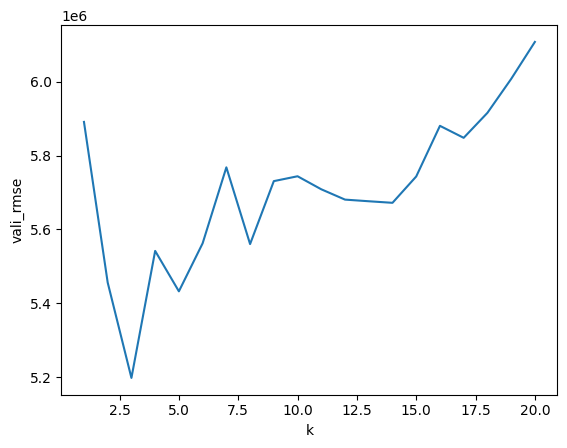

In [ ]:
sns.lineplot(pos_knn_df, x = 'k', y = 'vali_rmse')

##For Pitchers

In [ ]:
from sklearn.neighbors import KNeighborsRegressor#Import

In [ ]:
x = pitchers_22thru24[pitcher_x_cols] #Columns for data
y = pitchers_22thru24[pitcher_target]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [ ]:
x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
neigh = KNeighborsRegressor(n_neighbors= 13)
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [ ]:
neigh.score(x_train, y_train)

0.5876840472467049

In [ ]:
neigh.score(x_vali, y_vali)

0.5630030760559874

In [ ]:
train_prediction = neigh.predict(x_train)

train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
train_rmse

4515529.608547913

In [ ]:
vali_prediction = neigh.predict(x_vali)

vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
vali_rmse

3311359.5106020137

In [ ]:
valid_rmse = []
k_neighbors = []

for i in range(1,21):
  x = pitchers_22thru24[pitcher_x_cols] #Columns for data
  scaler = StandardScaler()

# Fit and transform the DataFrame
  x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
  y = pitchers_22thru24[pitcher_target]

  x_train, x_vali, y_train, y_vali = train_test_split( #Split data
    x_scaled, y, test_size=0.2, random_state=42)

  neigh = KNeighborsRegressor(n_neighbors= i)
  neigh.fit(x_train, y_train)

  vali_prediction = neigh.predict(x_vali)
  vali_rmse = np.sqrt(mean_squared_error(y_vali, vali_prediction))
  valid_rmse.append(vali_rmse)

  k_neighbors.append(i)


pitch_knn_dic = {'vali_rmse' : valid_rmse,
         'k': k_neighbors}


In [ ]:
pitch_knn_df = pd.DataFrame(pitch_knn_dic)

In [ ]:
pitch_knn_df

vali_rmse   k
0   4.523873e+06   1
1   4.329424e+06   2
2   3.578858e+06   3
3   3.419417e+06   4
4   3.390462e+06   5
5   3.519698e+06   6
6   3.472318e+06   7
7   3.440604e+06   8
8   3.463190e+06   9
9   3.432800e+06  10
10  3.445456e+06  11
11  3.373417e+06  12
12  3.311360e+06  13
13  3.344213e+06  14
14  3.340679e+06  15
15  3.349310e+06  16
16  3.353465e+06  17
17  3.346584e+06  18
18  3.386730e+06  19
19  3.331792e+06  20

<Axes: xlabel='k', ylabel='vali_rmse'>

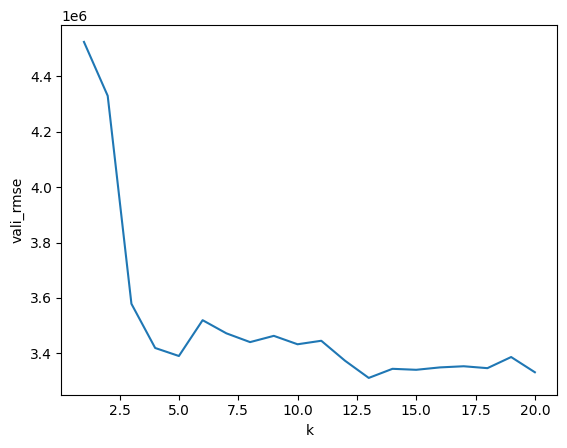

In [ ]:
sns.lineplot(pitch_knn_df, x = 'k', y= 'vali_rmse')

# Validation Error of Best Models

##For Position Players

In [ ]:
types_of_models = ['Multi Linear Regression', 'Decision Tree', 'KNN']
pos_rmses = [4.226281e+06, 4406031.688845816,	5432395.803344237]

In [ ]:
pos_error_dic = {'Model Type' : types_of_models,
                 'RMSE': pos_rmses}

pos_rmse_df = pd.DataFrame(pos_error_dic)


pos_rmse_df

Model Type          RMSE
0  Multi Linear Regression  4.226281e+06
1            Decision Tree  4.406032e+06
2                      KNN  5.432396e+06

Text(0.5, 1.0, 'Different Model Validation for position RMSE')

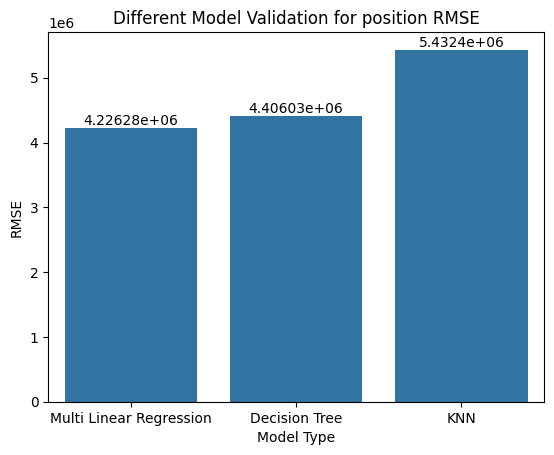

In [ ]:
ax = sns.barplot(pos_rmse_df, x = 'Model Type', y = 'RMSE')#
ax.bar_label(ax.containers[0])
ax.set_title('Different Model Validation for position RMSE') #Allows me to label wiht the value

##For Pitchers

In [ ]:
types_of_models = ['Multi Linear Regression', 'Decision Tree', 'KNN']
pitcher_rmses = [3.595794e+06, 3861407.6047718776, 3311359.5106020137]

In [ ]:
pitcher_error_dic = {'Model Type' : types_of_models,
                 'RMSE': pitcher_rmses}

pitcher_rmse_df = pd.DataFrame(pitcher_error_dic)


pitcher_rmse_df

Model Type          RMSE
0  Multi Linear Regression  3.595794e+06
1            Decision Tree  3.861408e+06
2                      KNN  3.311360e+06

Text(0.5, 1.0, 'Different Model Validation for pitcher RMSE')

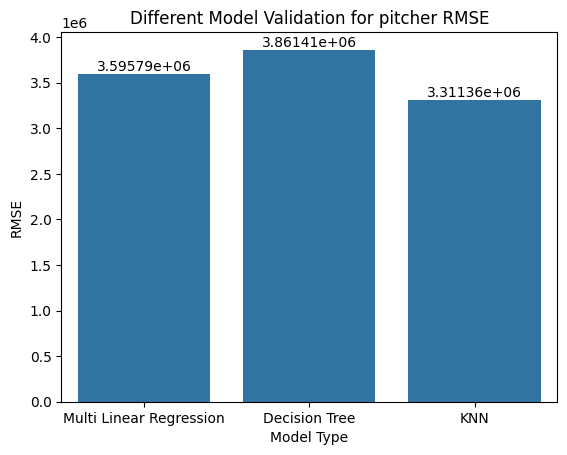

In [ ]:
ax = sns.barplot(pitcher_rmse_df, x = 'Model Type', y = 'RMSE')#
ax.bar_label(ax.containers[0])
ax.set_title('Different Model Validation for pitcher RMSE') #Allows me to label wiht the value